In [1]:
import pandas as pd
import os
from MILWRM.MxIF import *
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage.filters import gaussian
import umap
import itertools
from MILWRM.ST import *

In [2]:
import PIL

In [3]:
PIL.Image.MAX_IMAGE_PIXELS = None

In [4]:
df = pd.read_csv("/media/disk2/atlas_mxif/data/slideRegion_imagePaths.csv")
df.slide_region[0:45]

0     HTA11_10167_0000_01_01_region_001
1     HTA11_10167_0000_01_01_region_002
2     HTA11_10167_0000_01_01_region_003
3     HTA11_10167_0000_01_01_region_004
4     HTA11_10623_0000_01_01_region_001
5     HTA11_10623_0000_01_01_region_002
6     HTA11_10623_0000_01_01_region_003
7     HTA11_10623_0000_01_01_region_004
8     HTA11_10623_0000_01_01_region_005
9     HTA11_10623_0000_01_01_region_006
10    HTA11_10711_0000_01_01_region_001
11     HTA11_4255_0000_02_02_region_001
12     HTA11_4255_0000_02_02_region_002
13    HTA11_6298_0000_04A_03_region_001
14    HTA11_6298_0000_04A_03_region_002
15    HTA11_6298_0000_04A_03_region_003
16     HTA11_6801_0000_01_01_region_001
17     HTA11_7179_0000_02_02_region_001
18     HTA11_7663_0000_01_01_region_001
19     HTA11_7663_0000_01_01_region_002
20     HTA11_7862_0000_02_02_region_001
21     HTA11_7862_0000_02_02_region_002
22     HTA11_7862_0000_02_02_region_003
23     HTA11_7956_0000_02_05_region_001
24     HTA11_7956_0000_02_05_region_002


In [5]:
# CD4 and CD45 are read similarly so _ needs to be added at the end of CD4

markers = ["BCATENIN","CD20","CD3D","CD4_","CD68","CD8","CGA",\
           "COLLAGEN","ERBB2","FOXP3","HLAA","LYSOZYME","MUC2","NAKATPASE","OLFM4","PANCK","PCNA","PEGFR","PSTAT3","SMA","SOX9","VIMENTIN","GACTIN","CDX2","MUC5AC","DAPI"]

In [6]:
clustermarkers = ["BCATENIN","COLLAGEN","ERBB2","HLAA","LYSOZYME","MUC2","NAKATPASE","OLFM4","PANCK","PCNA","PEGFR","PSTAT3","SMA","SOX9","VIMENTIN","GACTIN","MUC5AC","CDX2"]

In [7]:
image_df = pd.read_csv("/media/disk2/atlas_mxif/BALANCED/mxif_labeler_df.csv",index_col = [0], converters={'mean estimators': pd.eval})
image_df = image_df.drop([3,19,35,36])

In [8]:
image_df.reset_index(drop= True, inplace=True)

In [12]:
from MILWRM.MILWRM import *

In [17]:
%time tl = mxif_labeler(image_df)

CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 1.63 ms


In [19]:
%time tl.prep_cluster_data(clustermarkers,  path_save = "/media/disk2/atlas_mxif/BALANCED/")

Loading img object from /media/disk2/atlas_mxif/BALANCED/downsampled_files/HTA11_10167_0000_01_01_ADJ_region_001_downsampled.npz...
Applying gaussian filter
Saving img object to /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_10167_0000_01_01_ADJ_region_001_downsampledfinal_preprocessed...
Loading img object from /media/disk2/atlas_mxif/BALANCED/downsampled_files/HTA11_10167_0000_01_01_ADJ_region_002_downsampled.npz...
Applying gaussian filter
Saving img object to /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_10167_0000_01_01_ADJ_region_002_downsampledfinal_preprocessed...
Loading img object from /media/disk2/atlas_mxif/BALANCED/downsampled_files/HTA11_10167_0000_01_01_ADJ_region_003_downsampled.npz...
Applying gaussian filter
Saving img object to /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_10167_0000_01_01_ADJ_region_003_downsampledfinal_preprocessed...
Loading img object from /media/disk2/atlas_mxif/BALANCED/downsampled_files/H

In [13]:
tl.cluster_data

array([[-0.63317975,  0.44209946, -0.89784383, ..., -0.68892395,
        -0.47243518, -0.76525685],
       [-0.4363806 ,  0.42282369, -0.36846293, ..., -0.40304295,
        -0.47243518, -0.51547871],
       [-1.12768426,  0.23101701, -0.66783361, ..., -0.96480366,
        -0.46588247, -0.73408482],
       ...,
       [ 0.83097629, -0.449897  ,  0.09622169, ...,  0.00335671,
        -0.47243518, -0.74160882],
       [ 0.39449799,  0.88567096, -0.82145854, ..., -0.40725795,
        -0.4498025 ,  0.33293771],
       [-0.34759607, -0.72382401,  2.58822299, ...,  0.25527726,
        -0.47243518, -0.51602454]])

Determining optimal cluster number k via scaled inertia


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  19 | elapsed:   32.3s remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   4 out of  19 | elapsed:  1.0min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   6 out of  19 | elapsed:  1.1min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   8 out of  19 | elapsed:  1.4min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  10 out of  19 | elapsed:  1.7min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:  2.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:  2.3min remaining:   48.4s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:  2.4min remaining:   27.3s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  3.3min finished


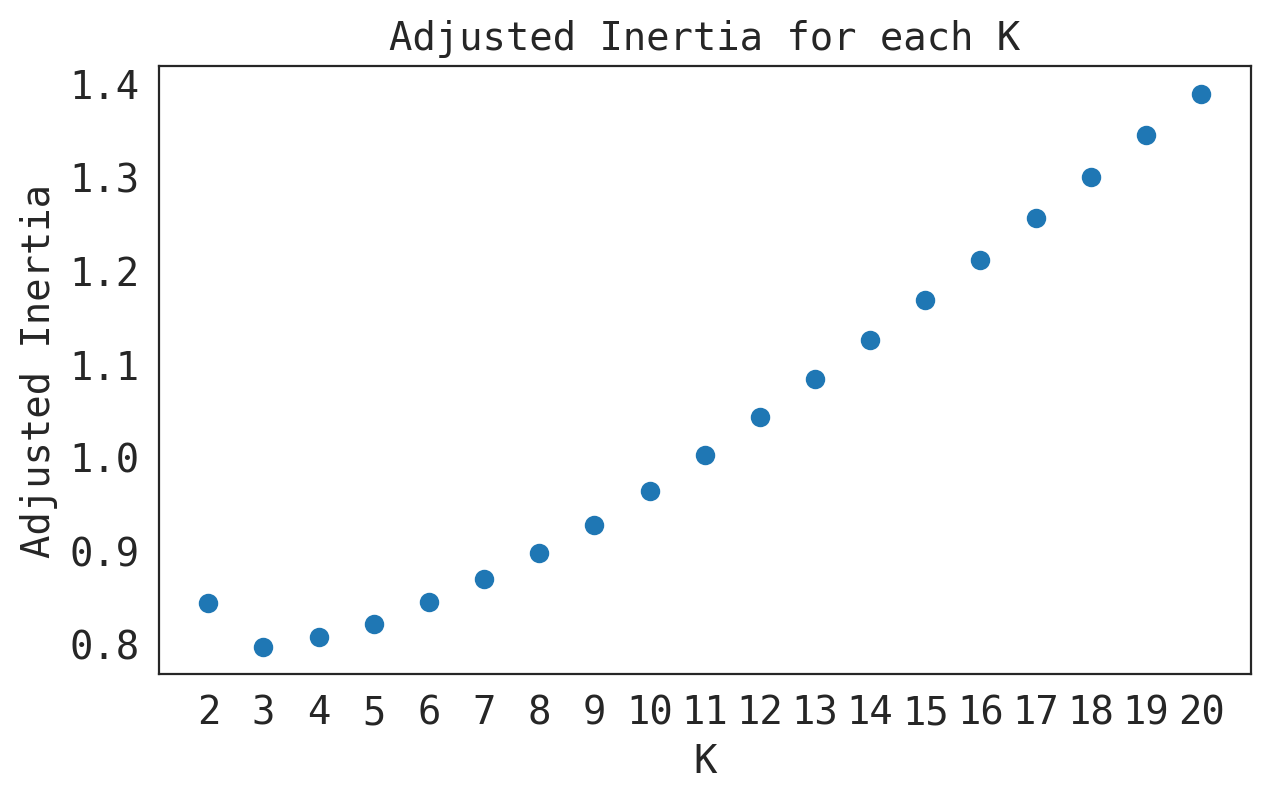

The optimal number of clusters is 3
Performing k-means clustering with 3 target clusters
Creating tissue_ID images for image objects...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  36 | elapsed:    1.0s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   9 out of  36 | elapsed:    3.0s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  13 out of  36 | elapsed:    3.4s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  17 out of  36 | elapsed:    3.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  21 out of  36 | elapsed:    4.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed:    4.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    4.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:    4.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    4.8s finished


In [20]:
tl.label_tissue_regions(alpha = 0.05)

/home/kaurh5/git/MILWRM/MILWRM/ST.py:812: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=figsize)


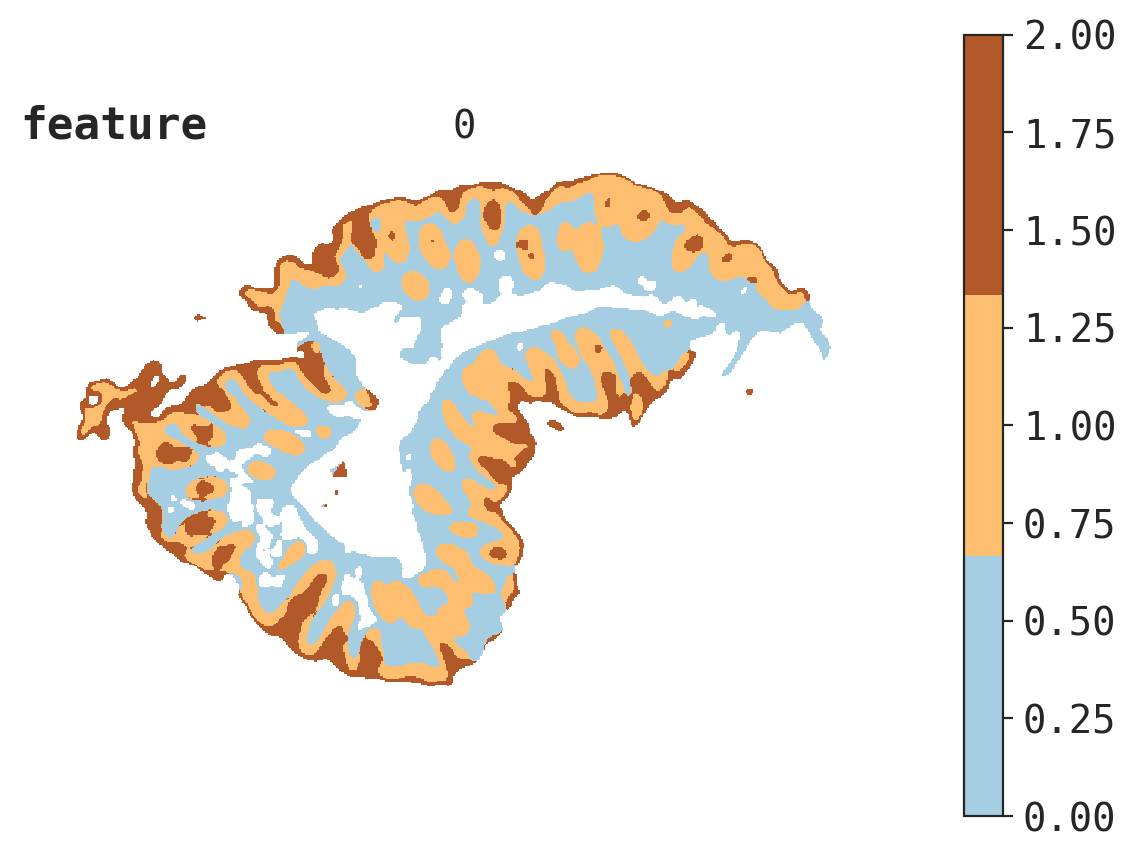

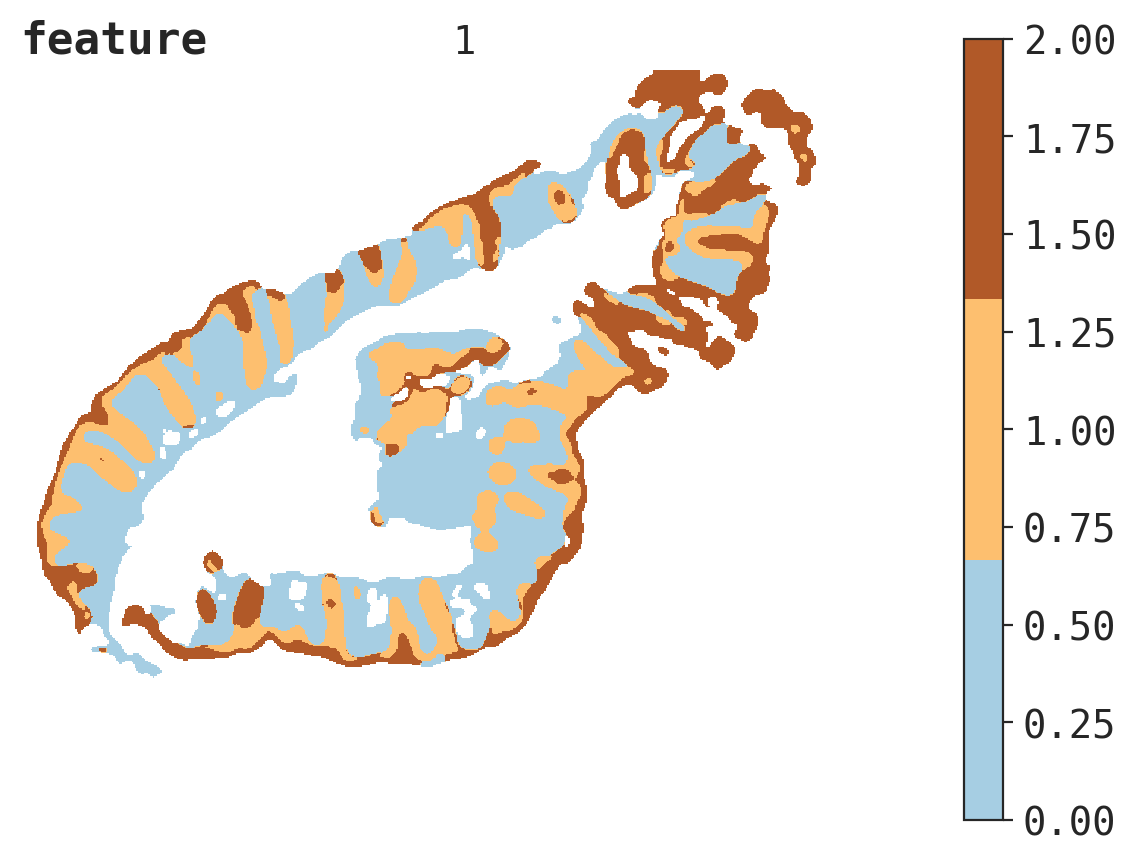

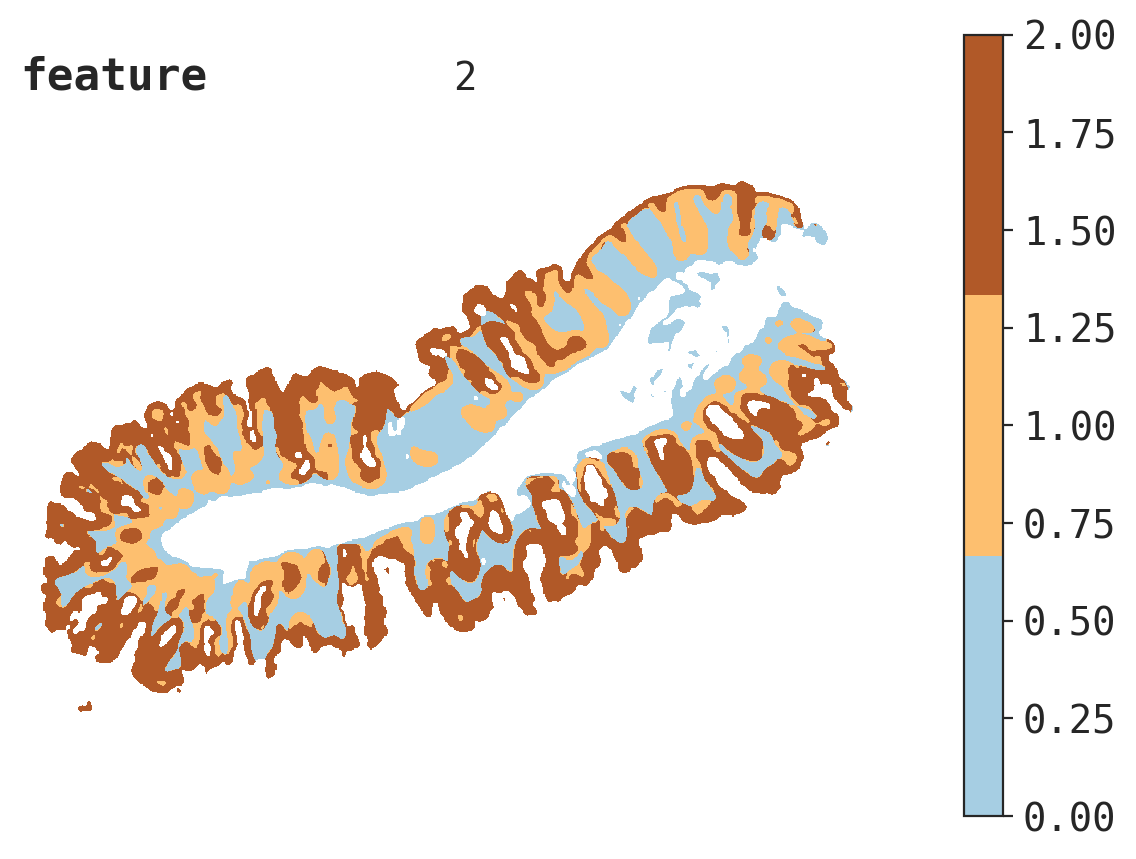

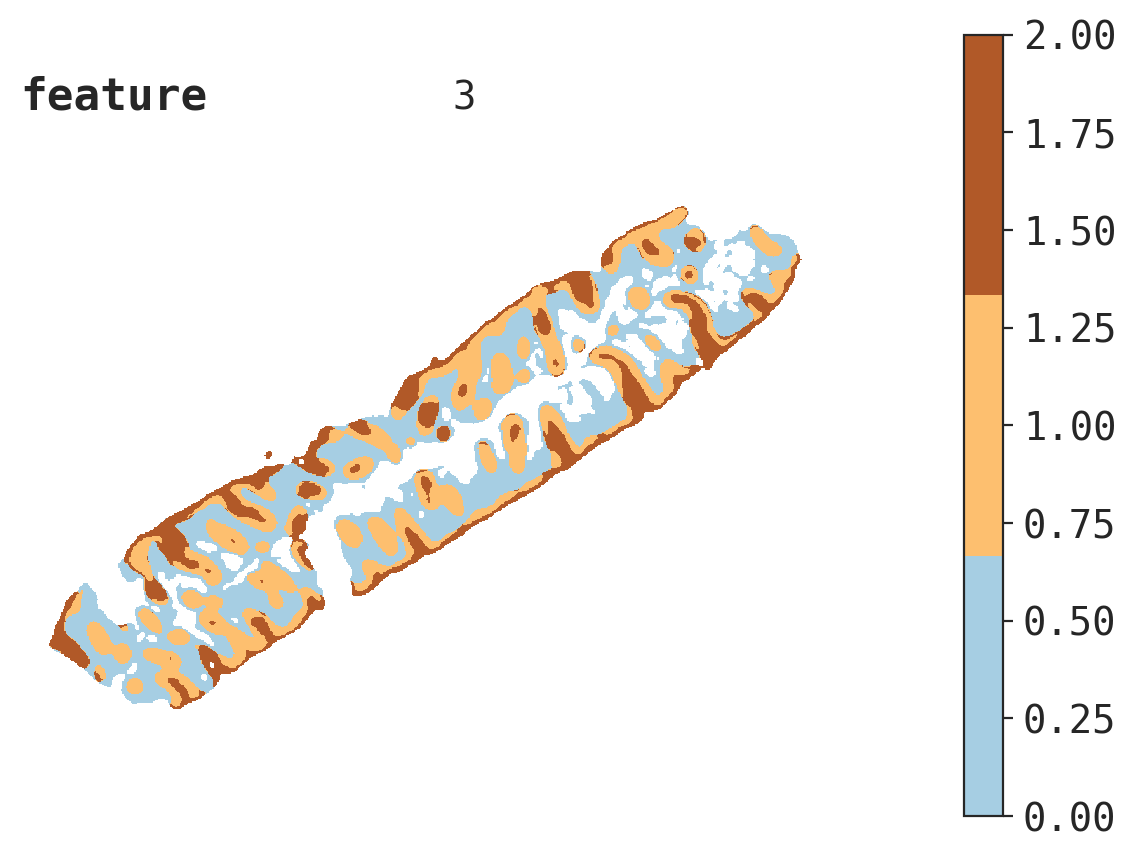

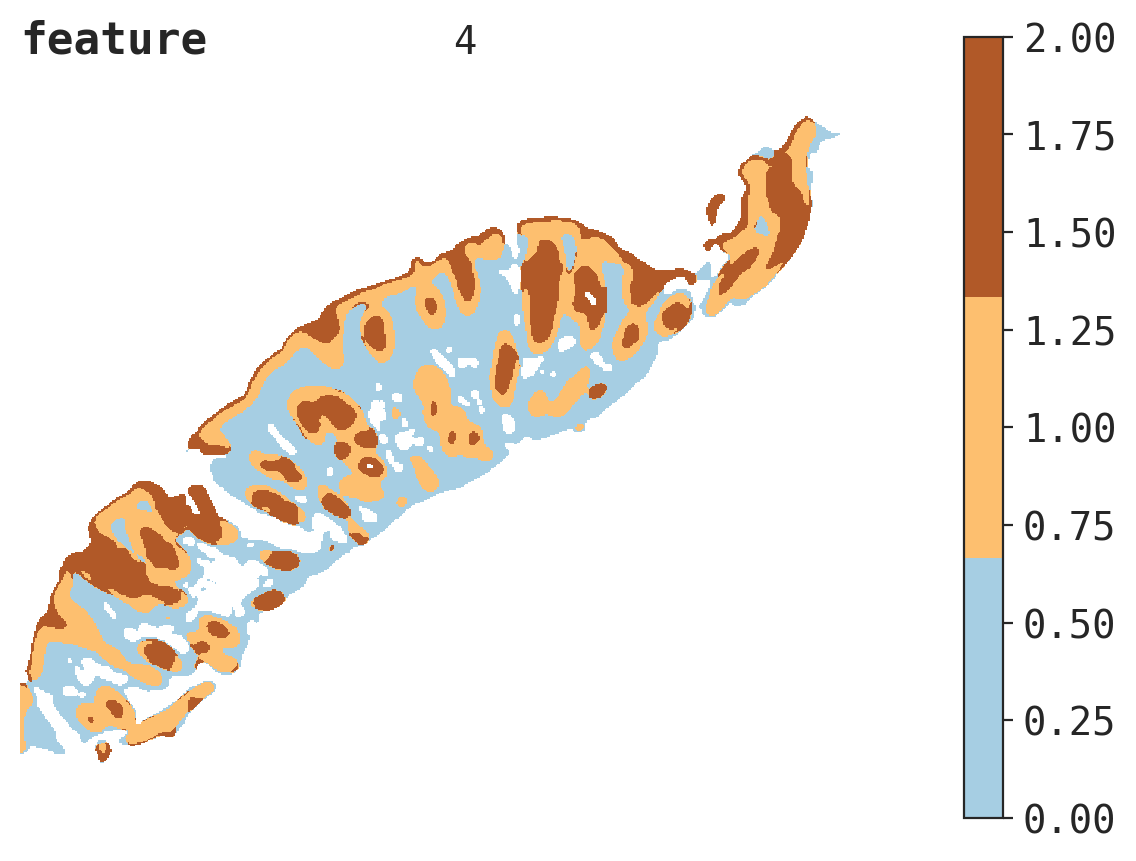

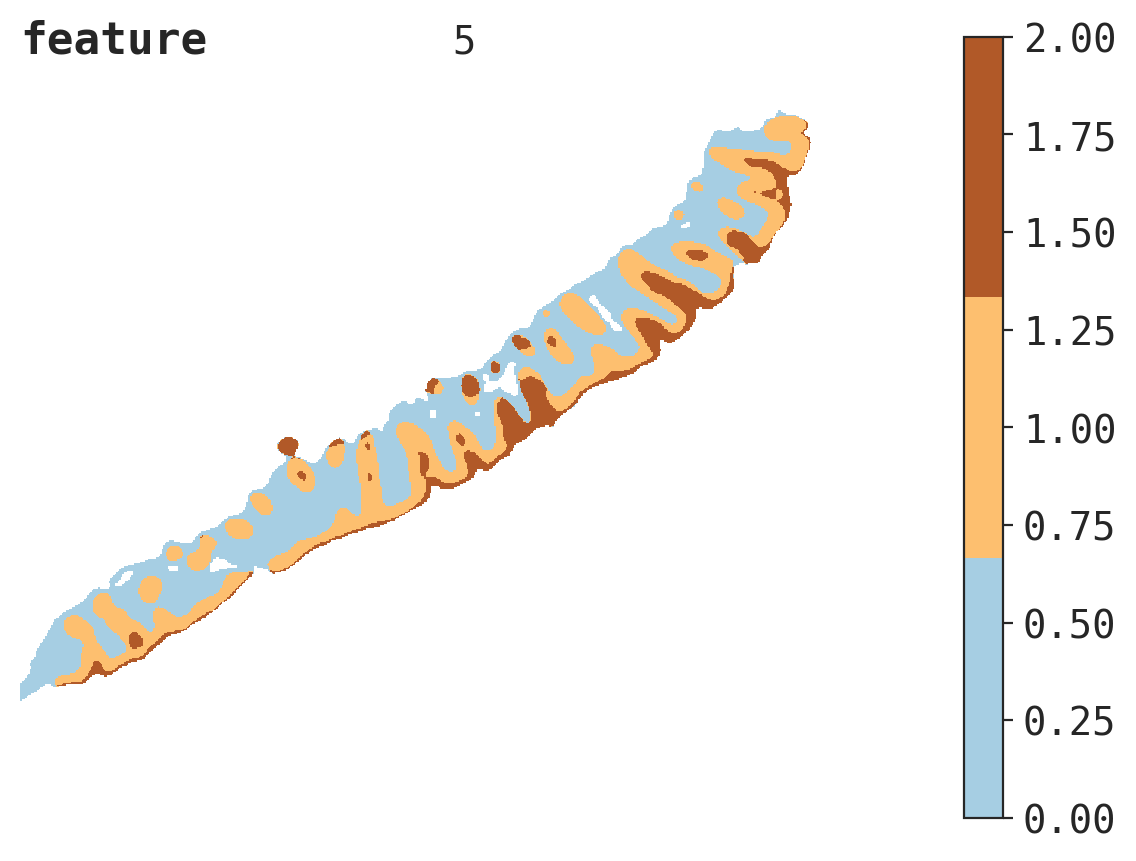

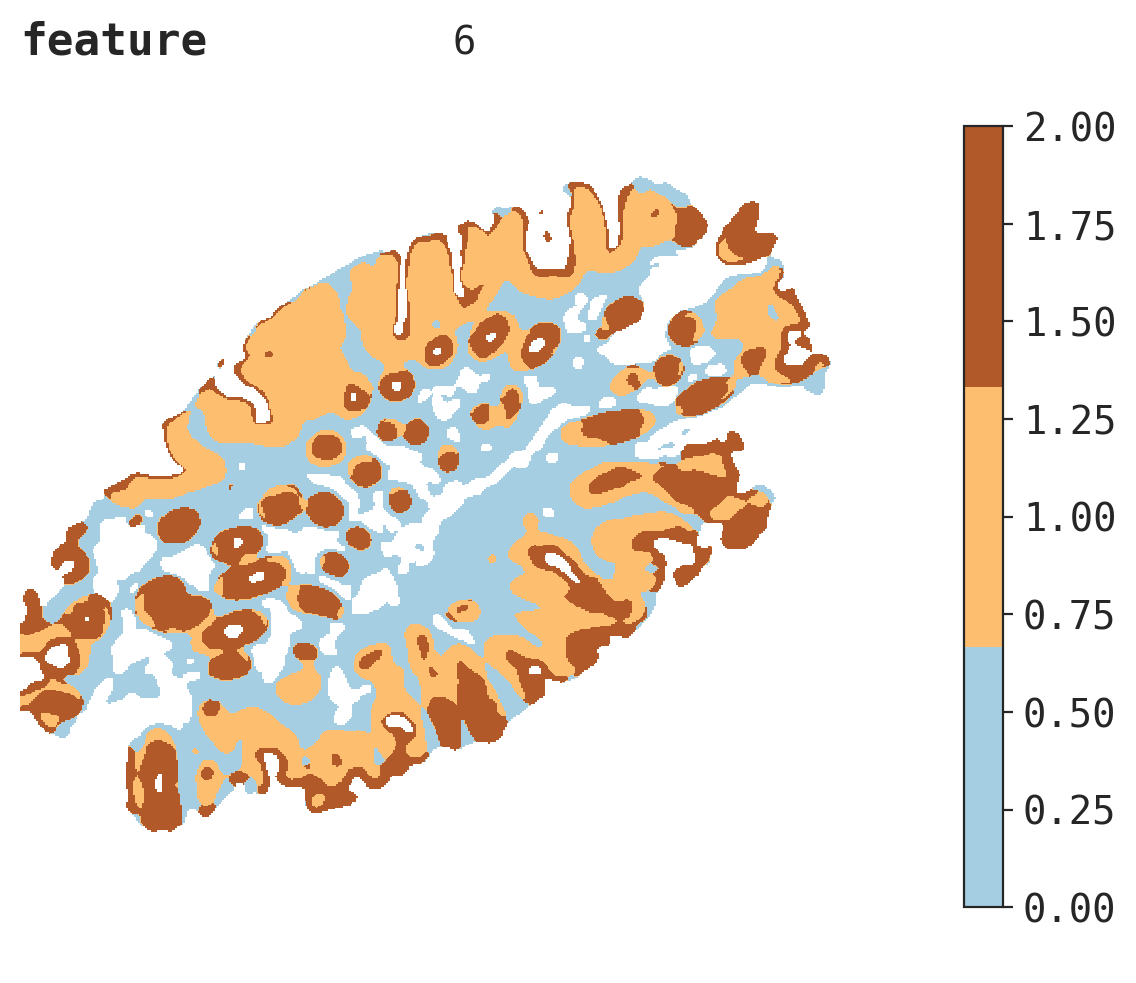

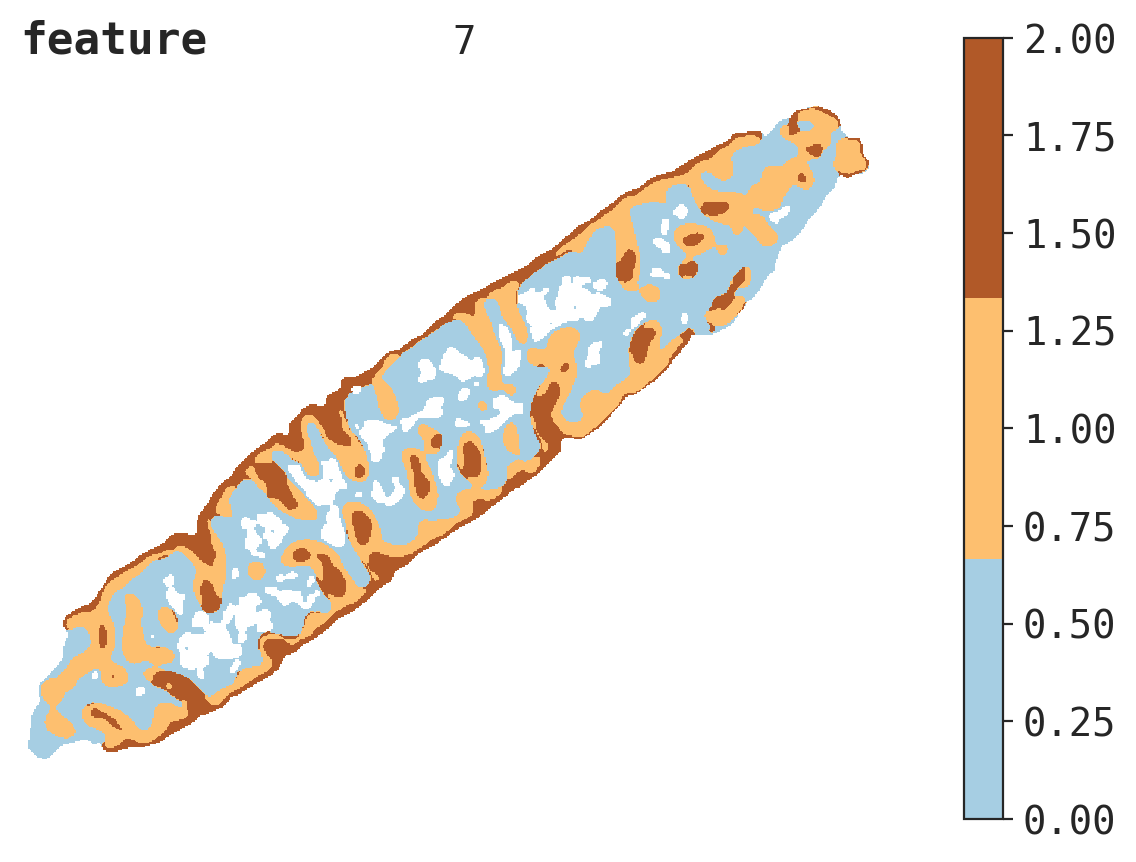

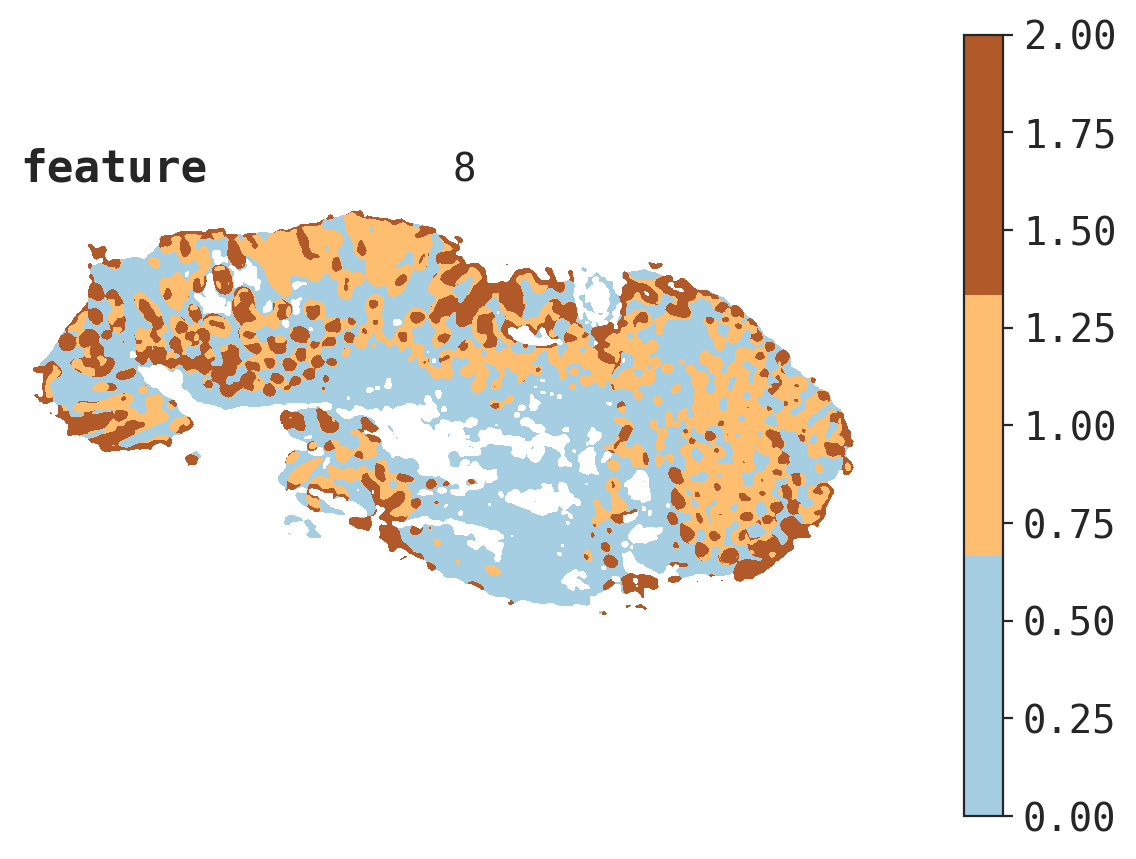

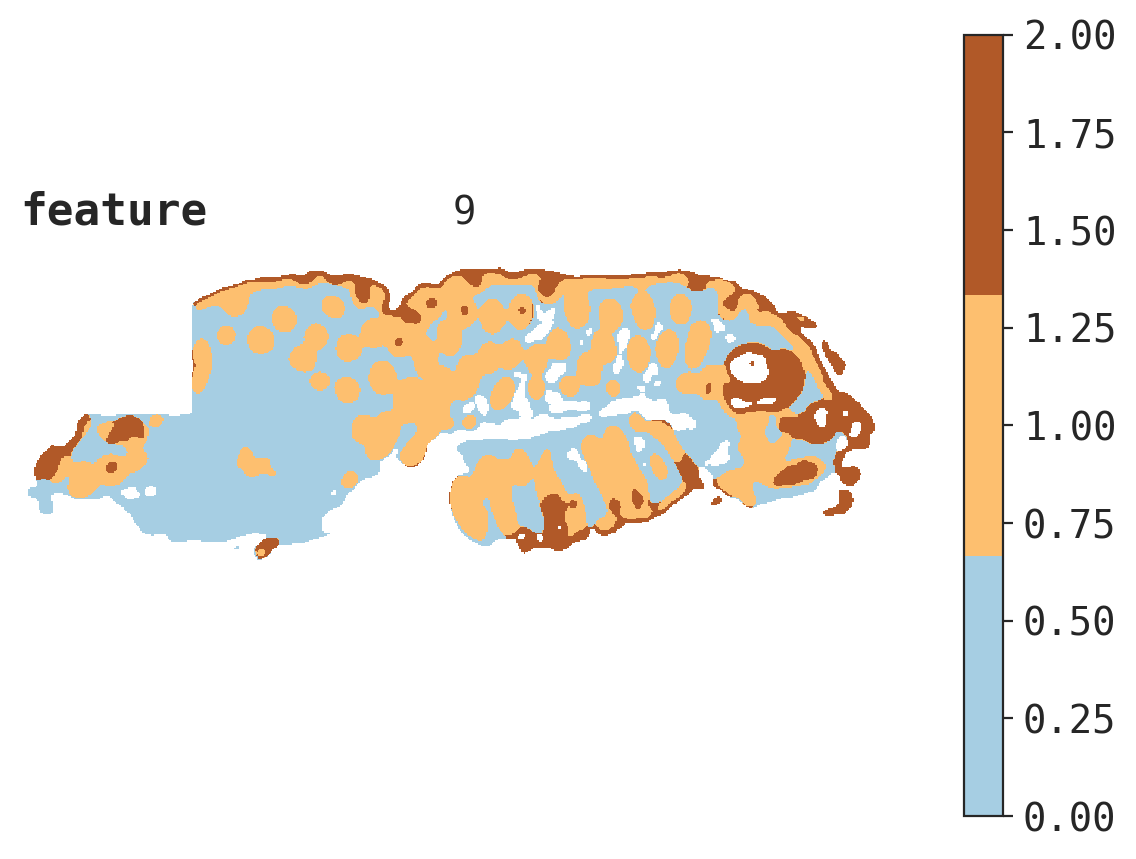

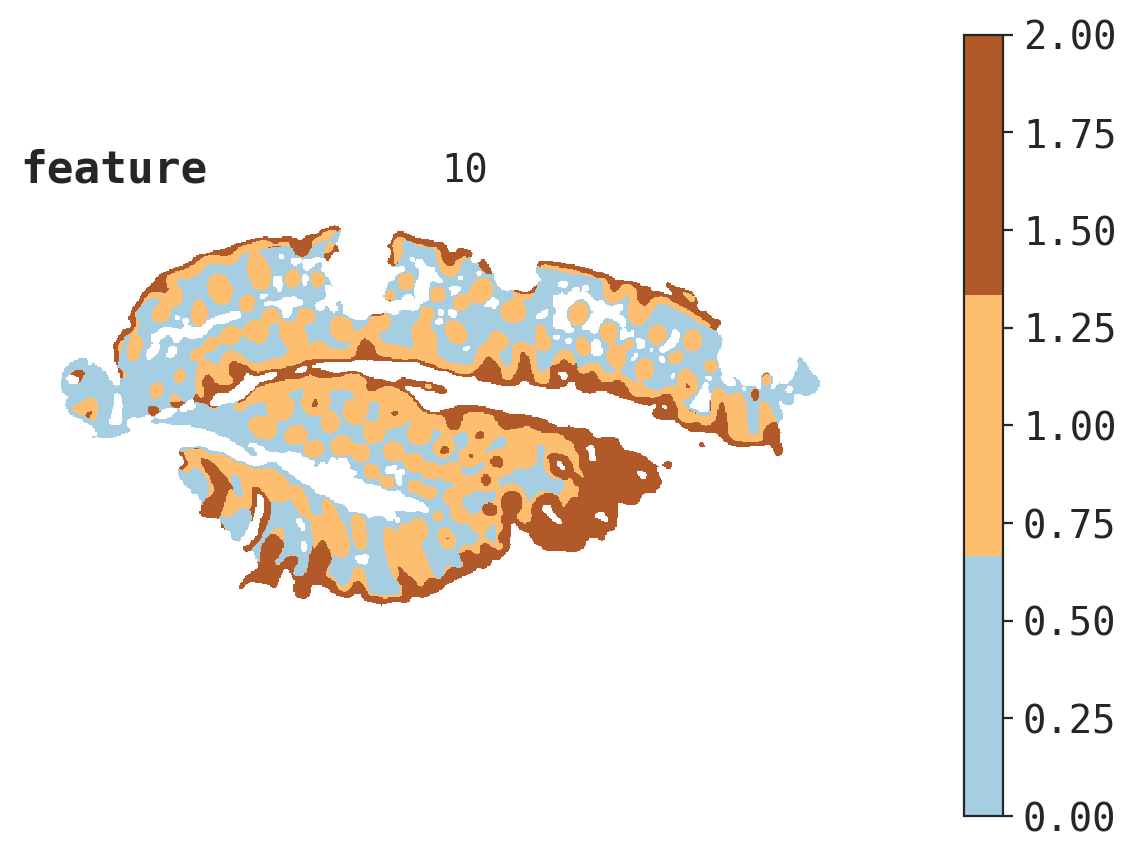

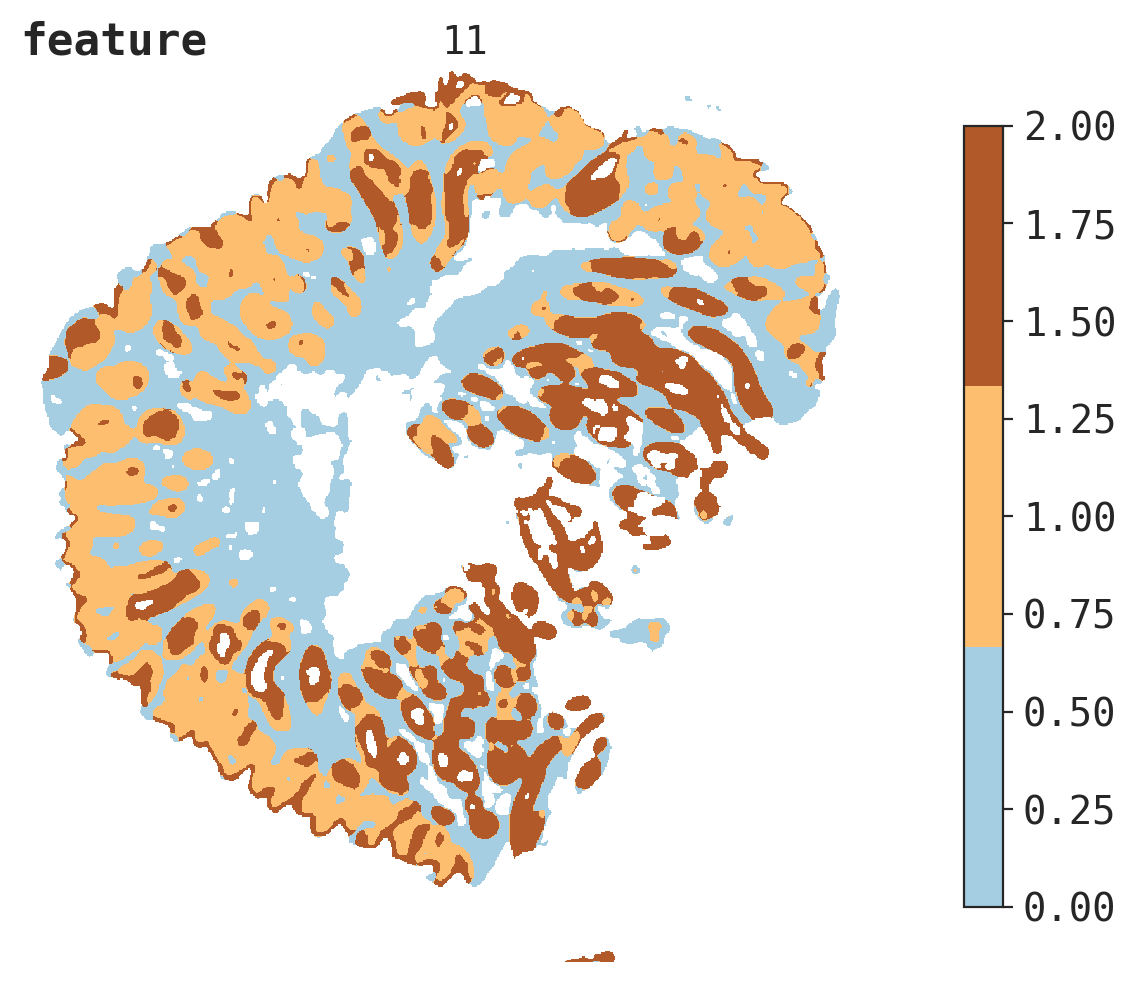

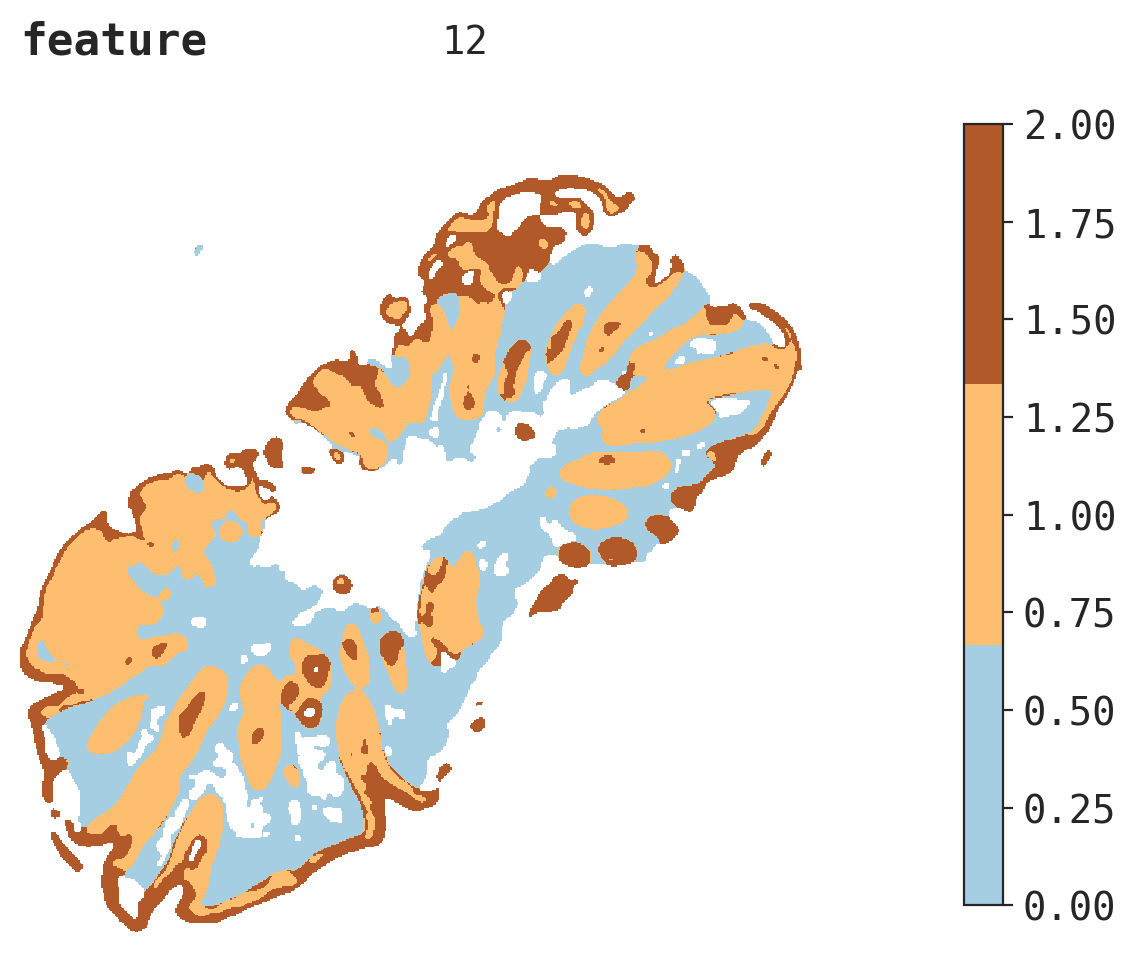

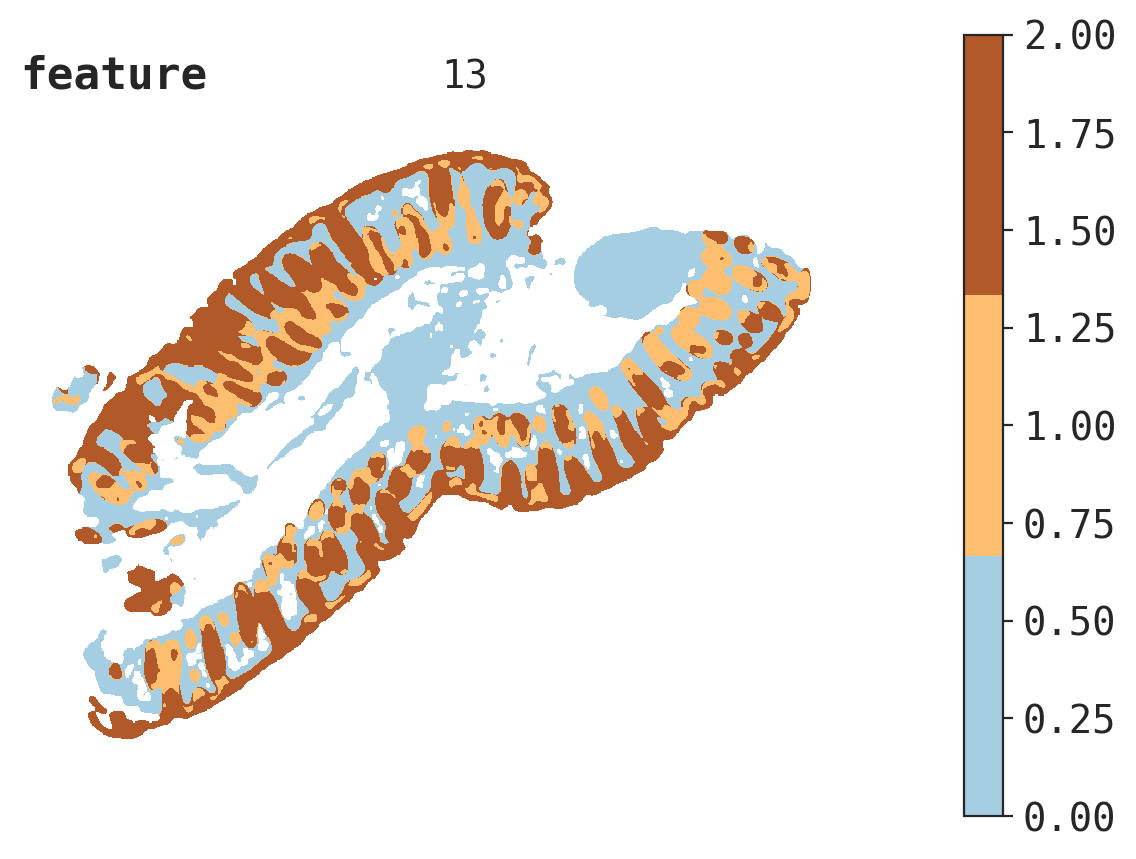

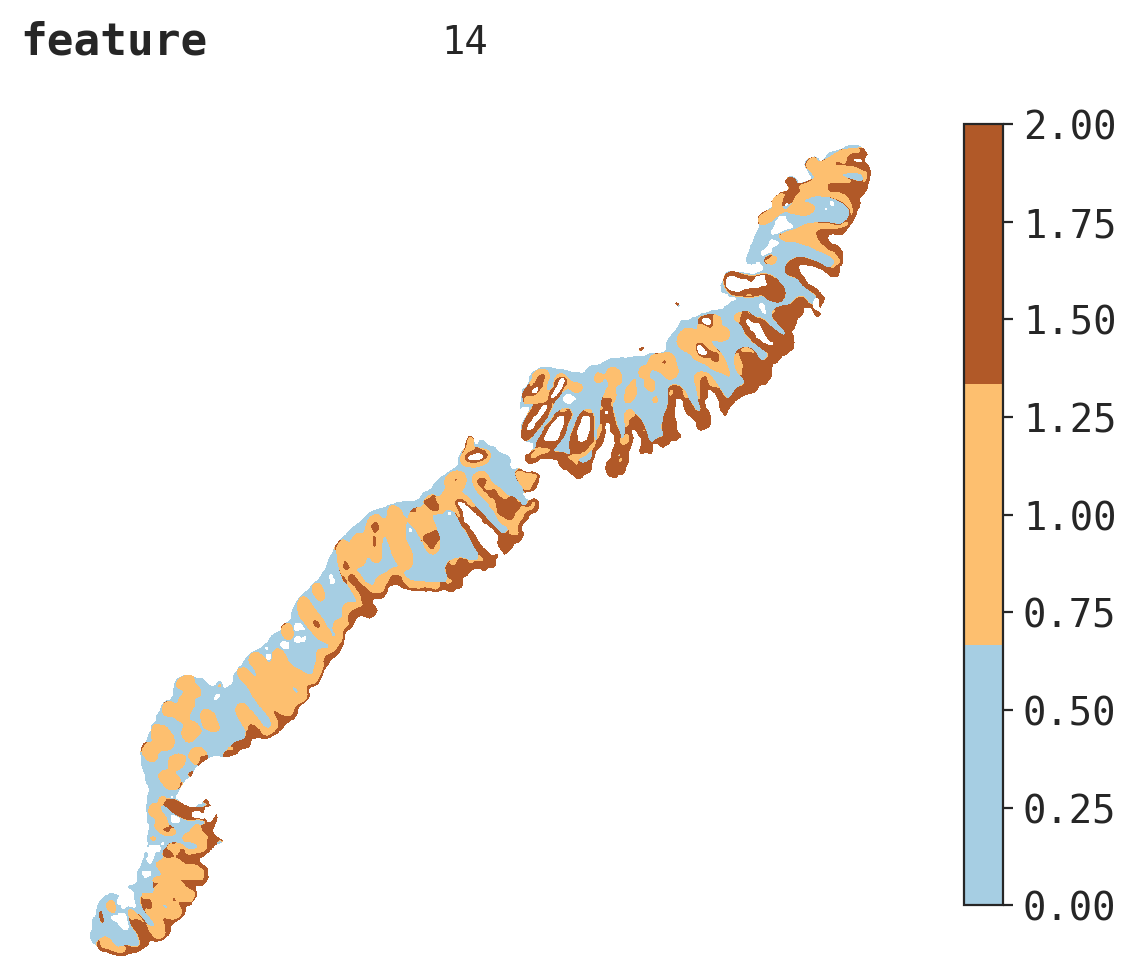

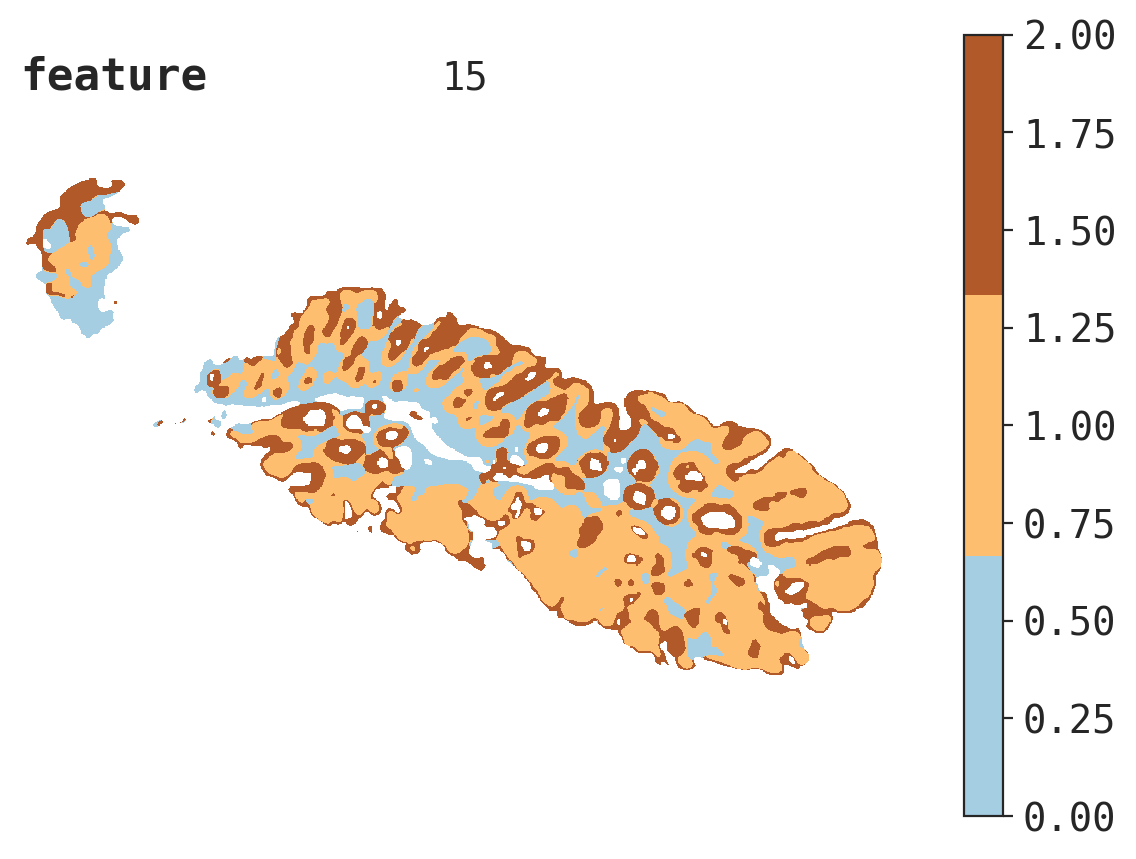

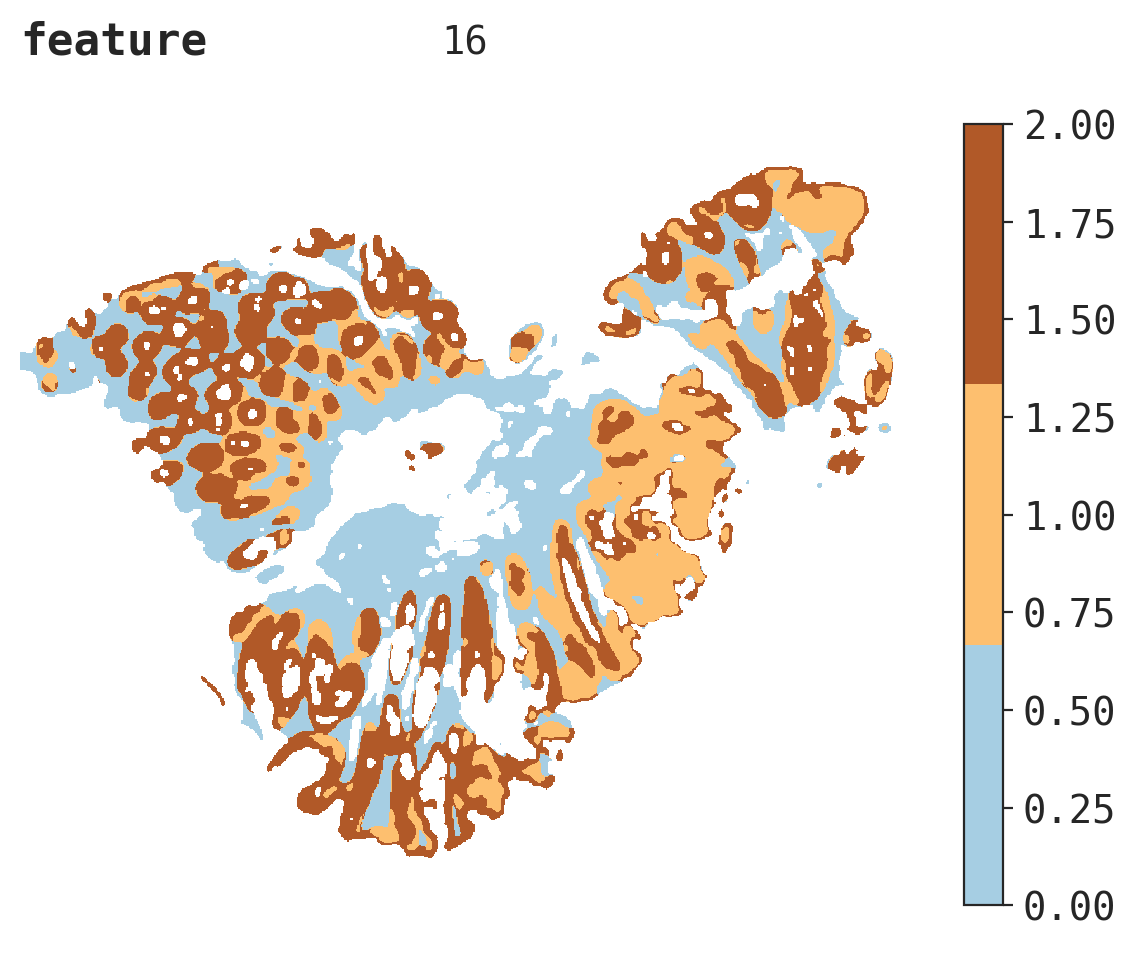

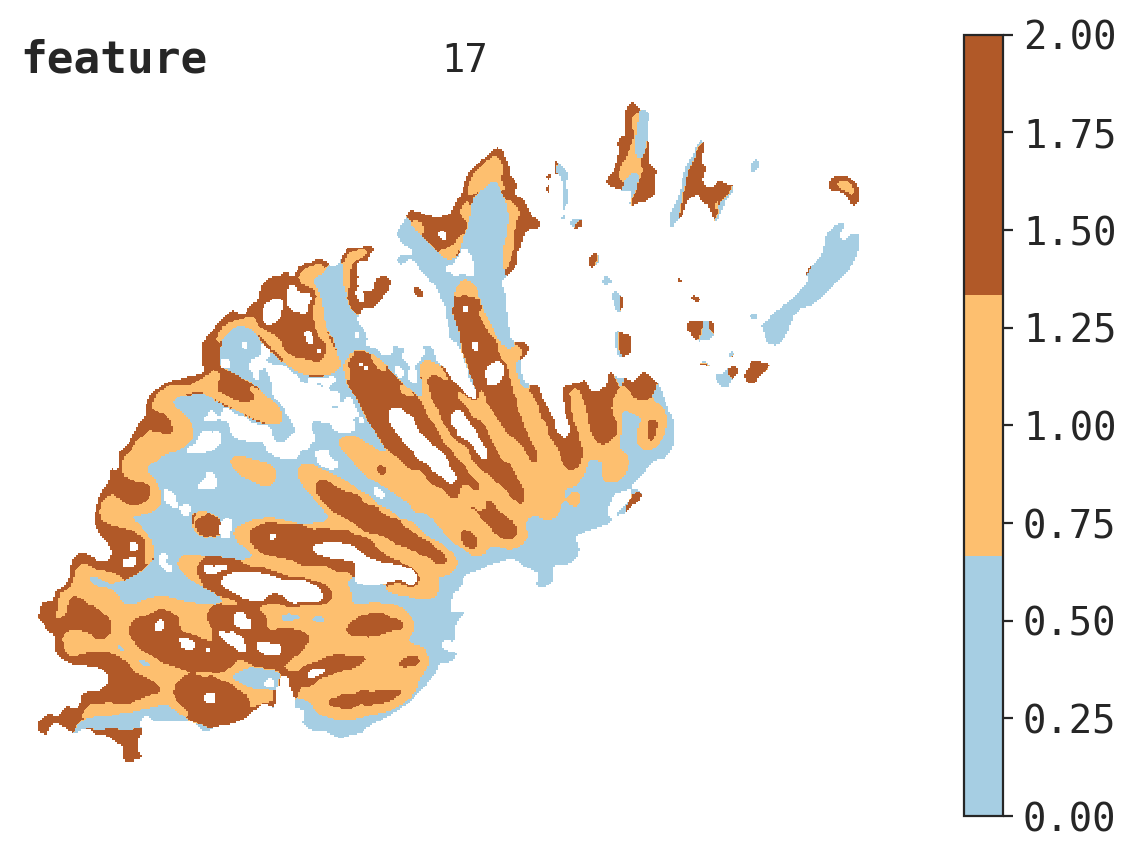

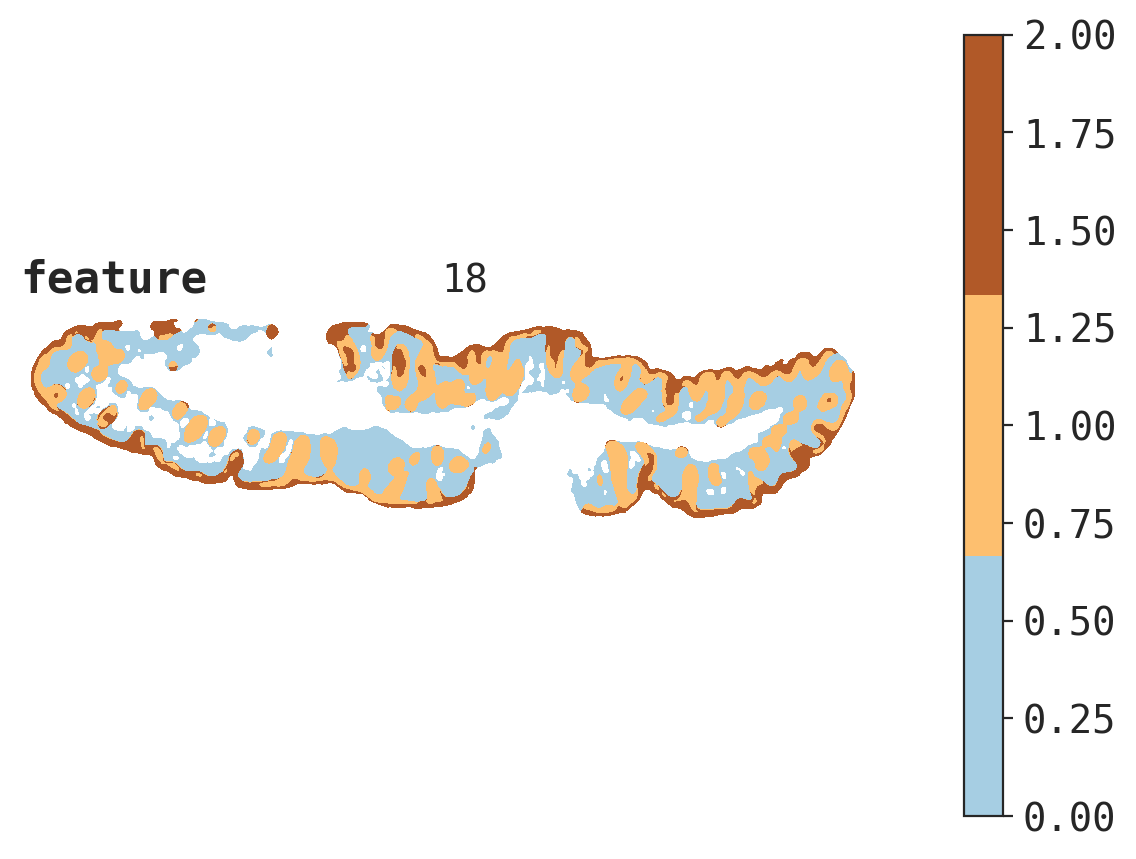

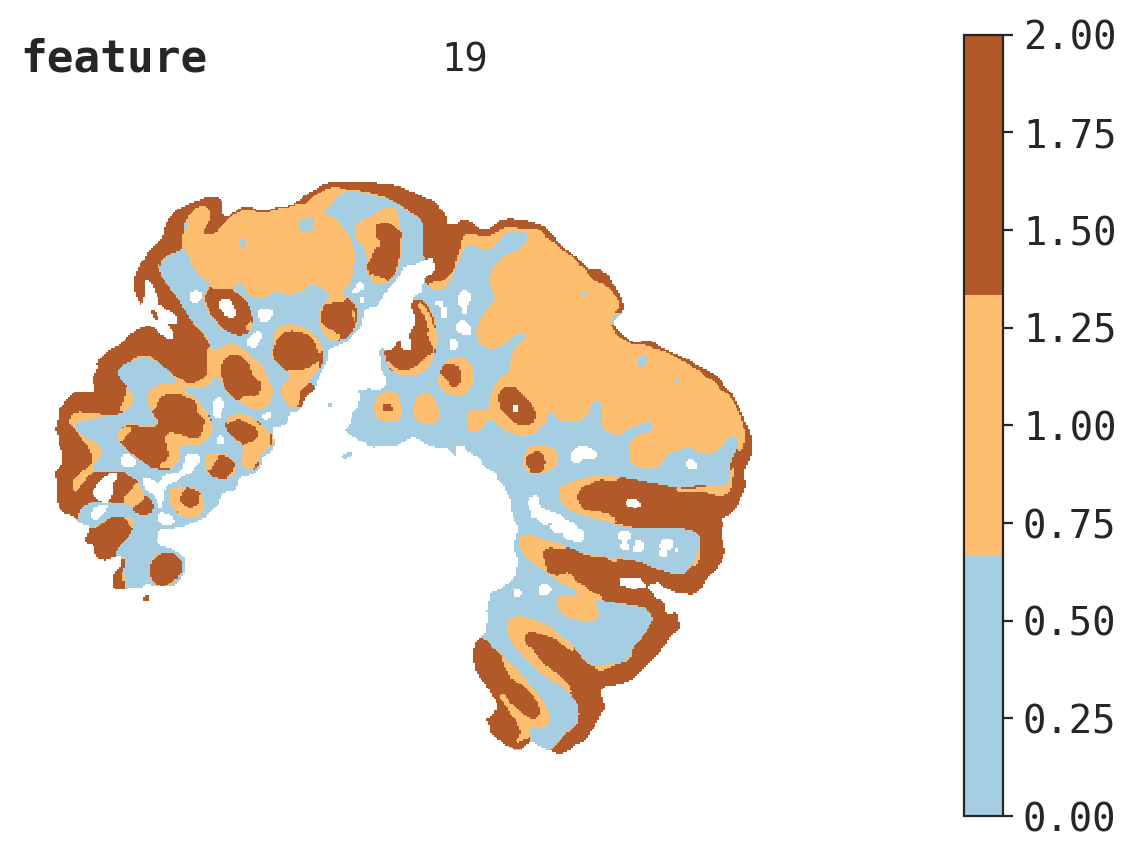

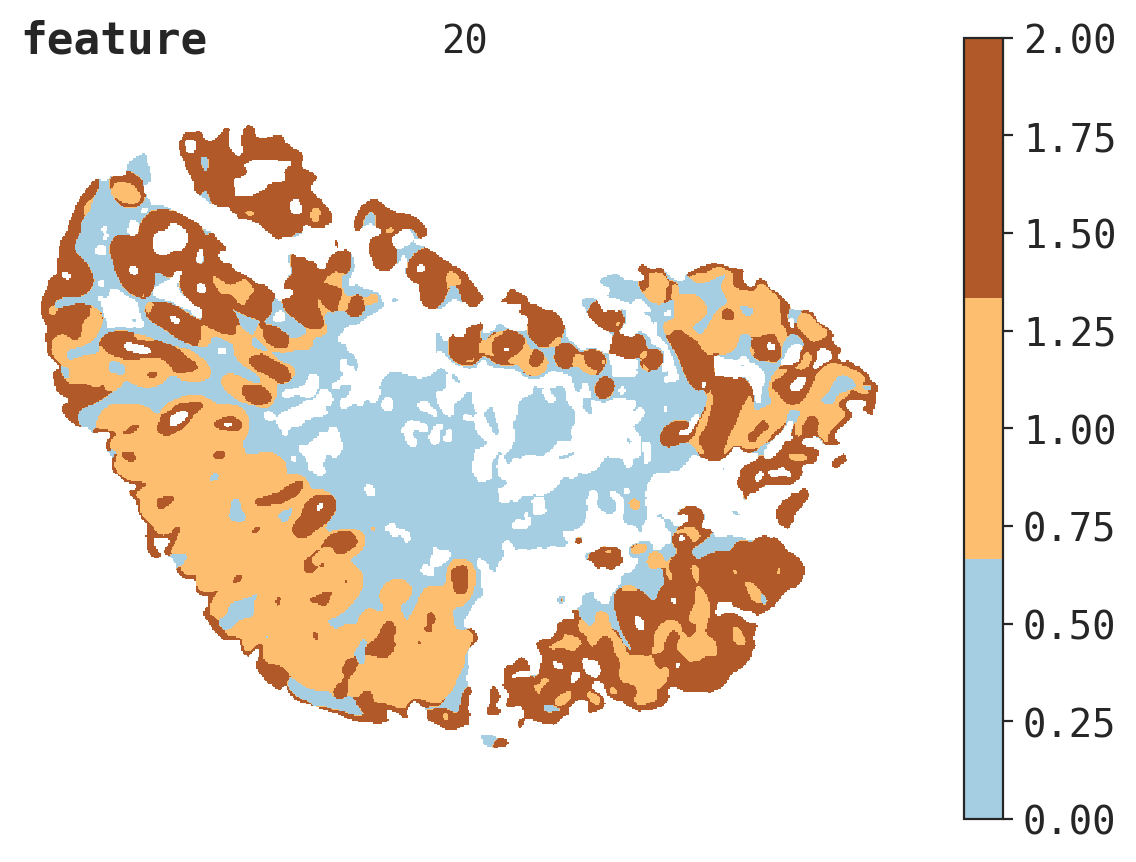

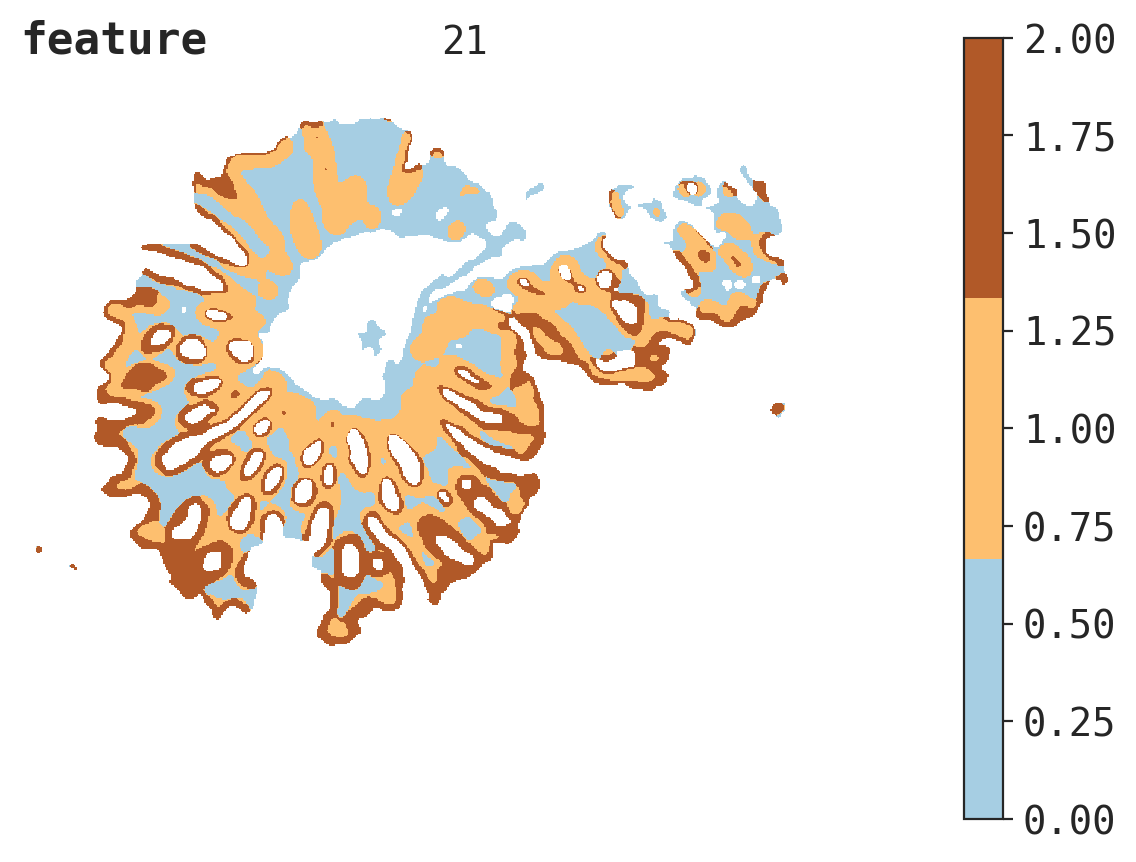

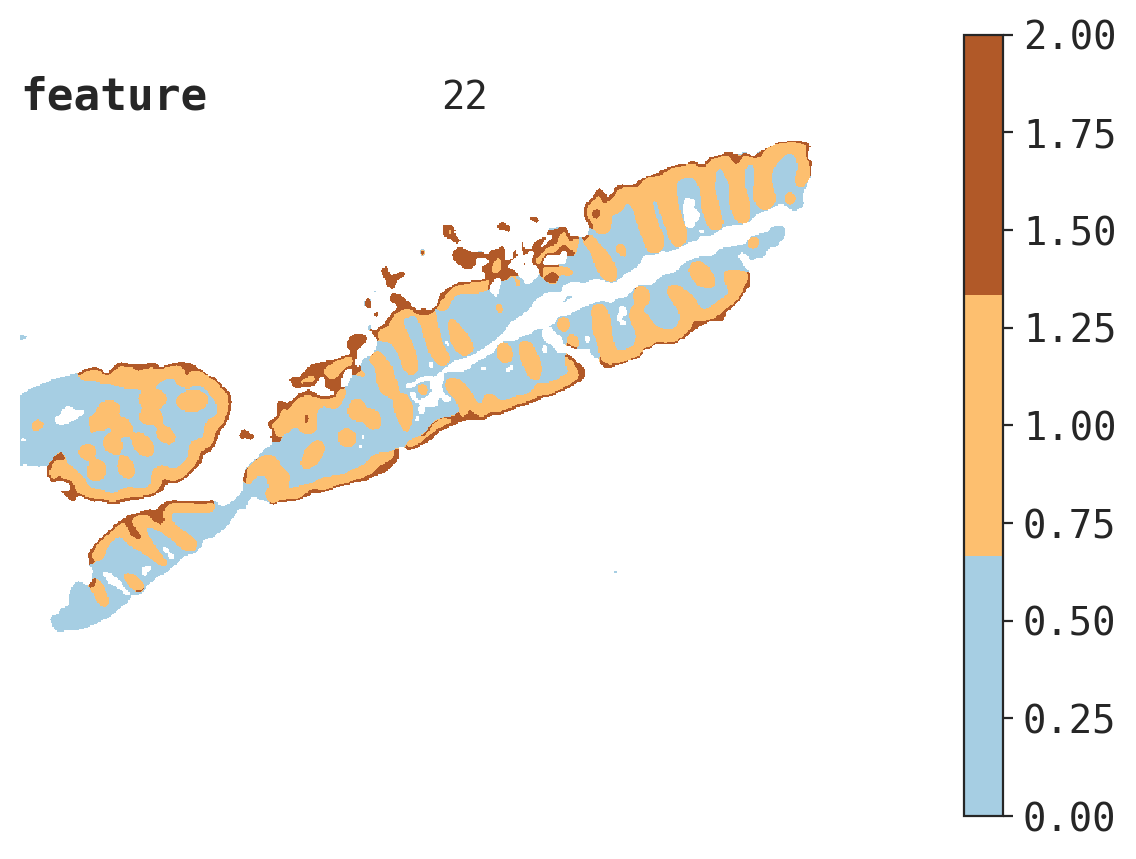

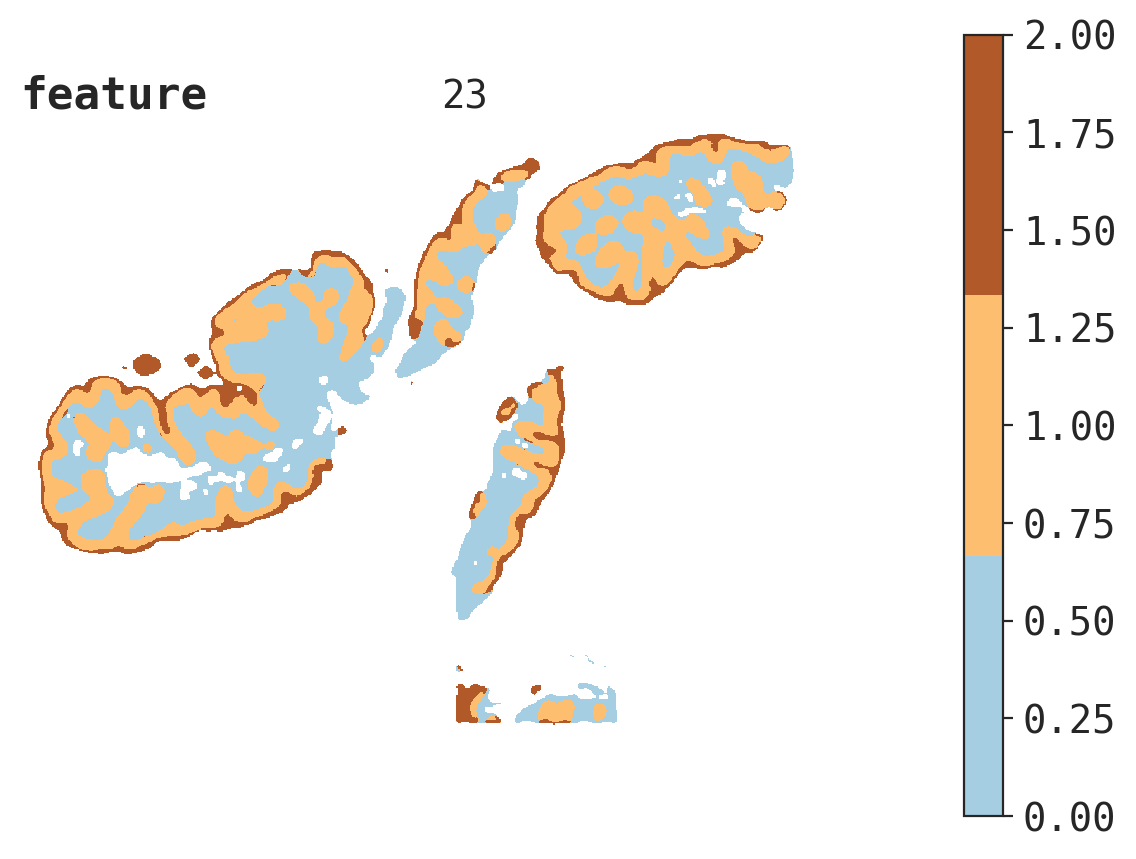

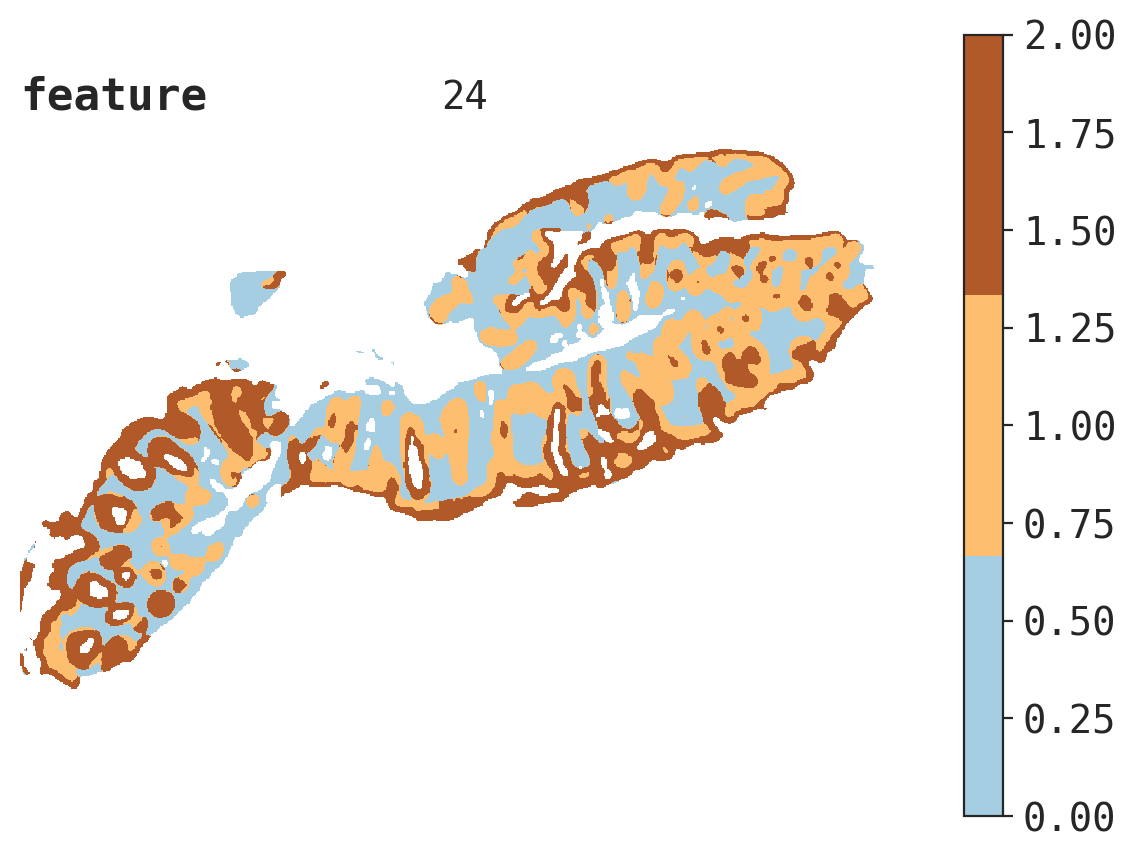

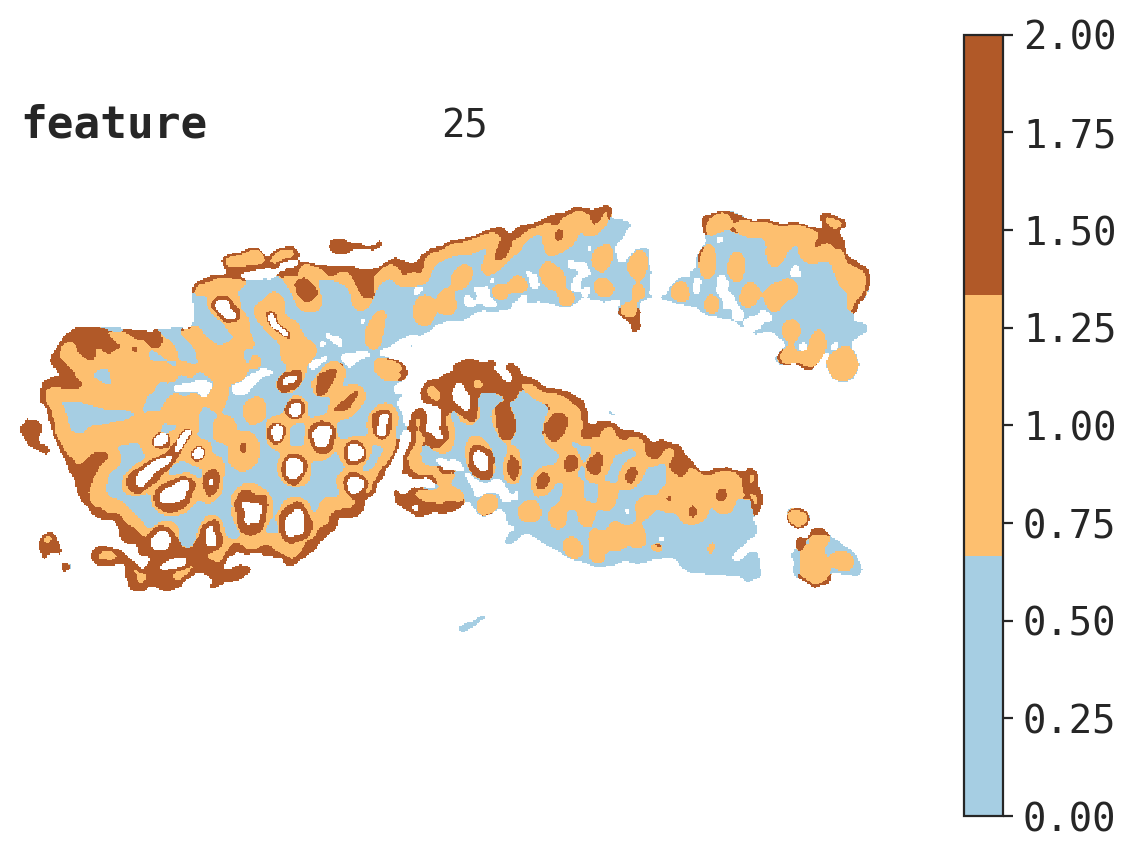

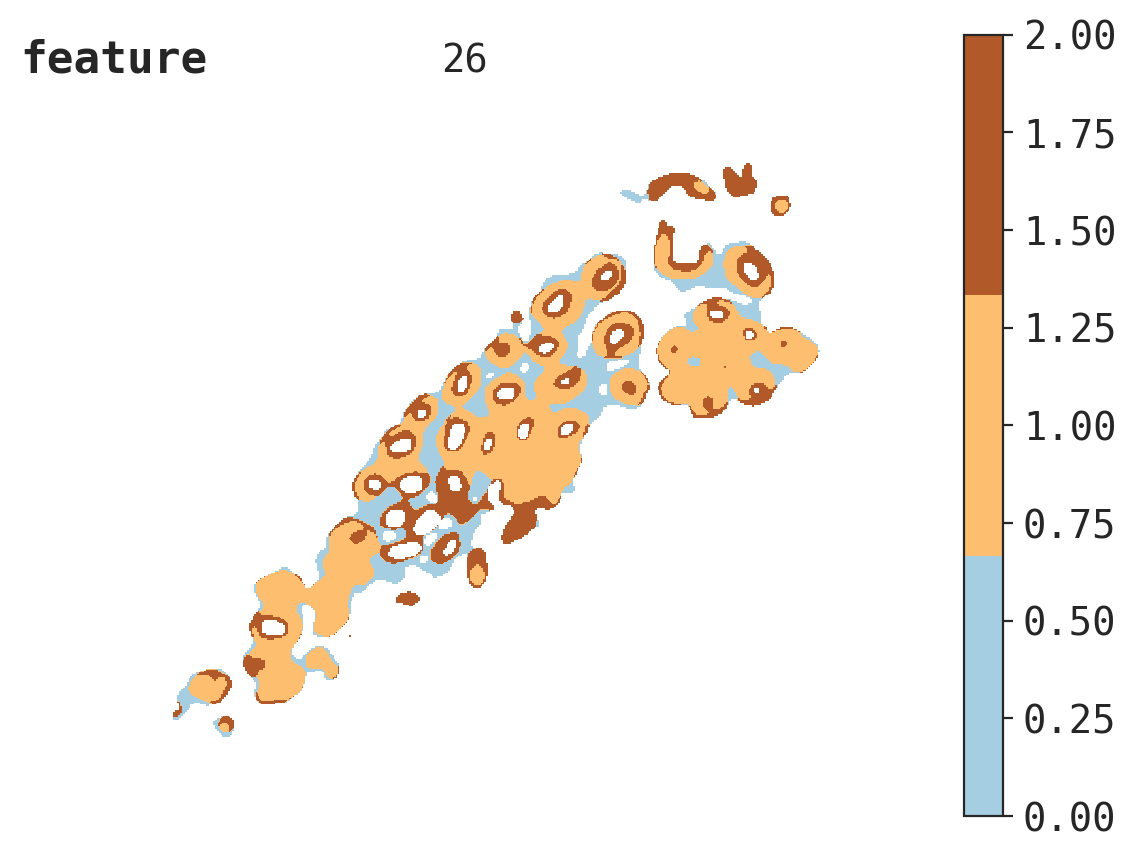

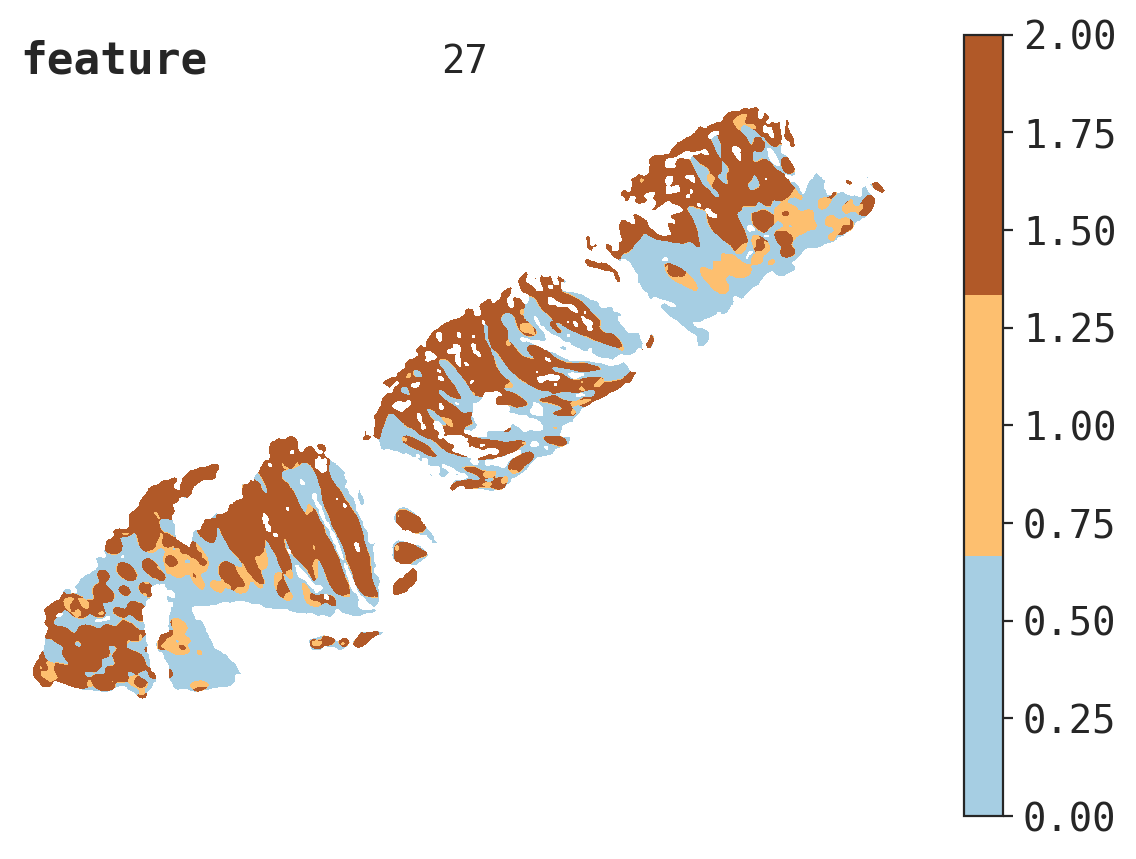

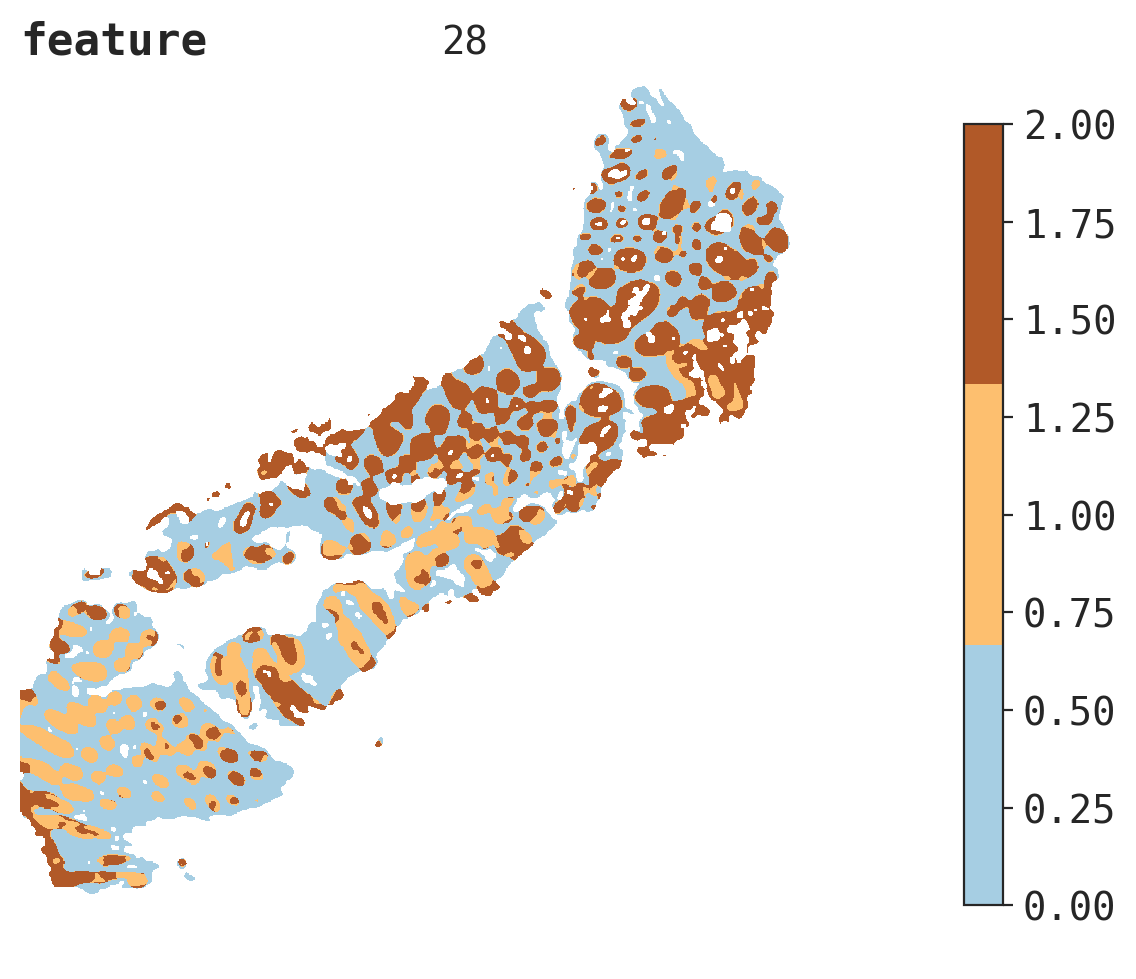

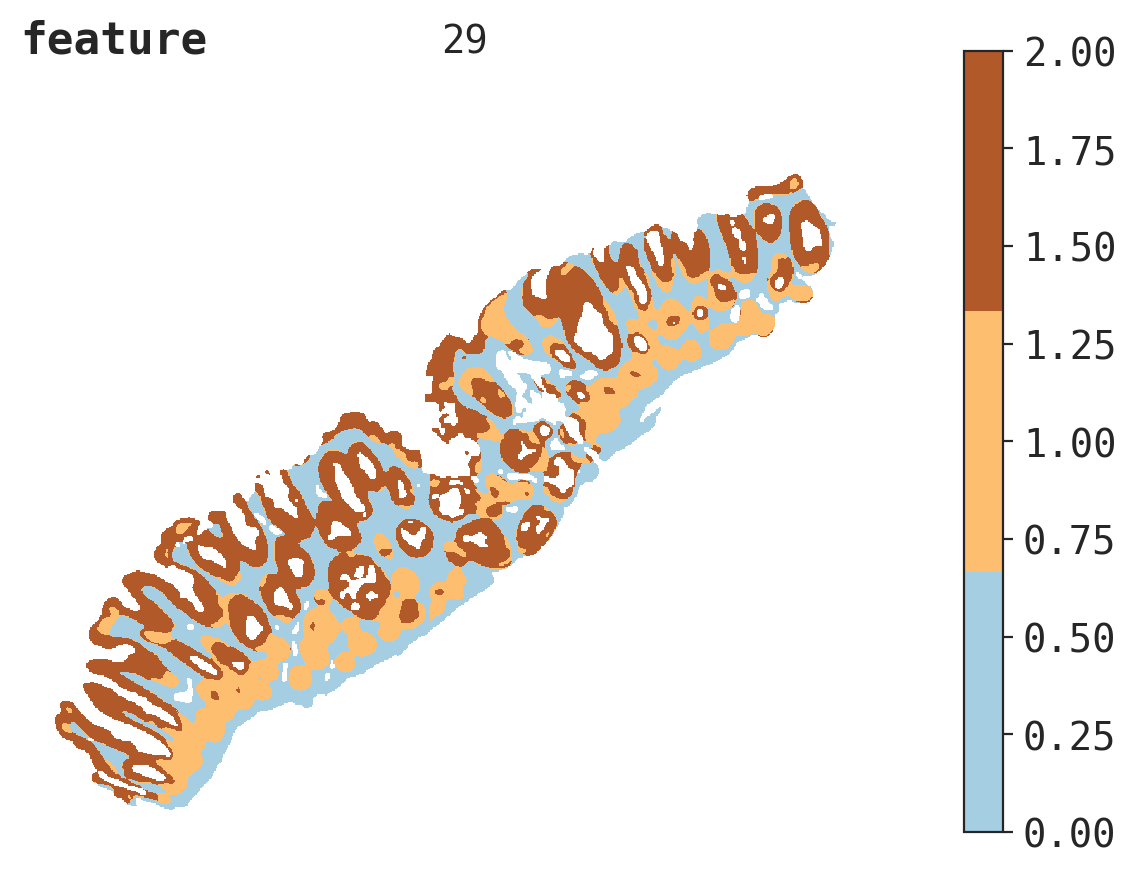

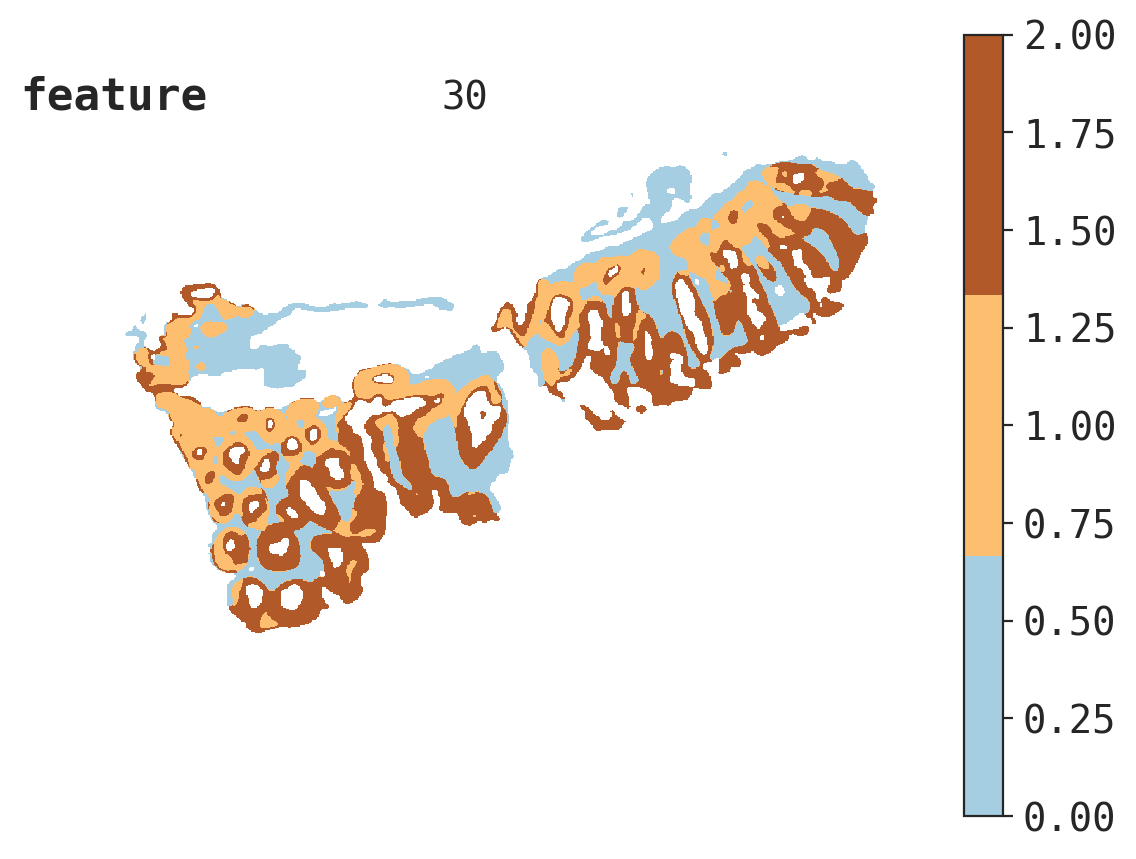

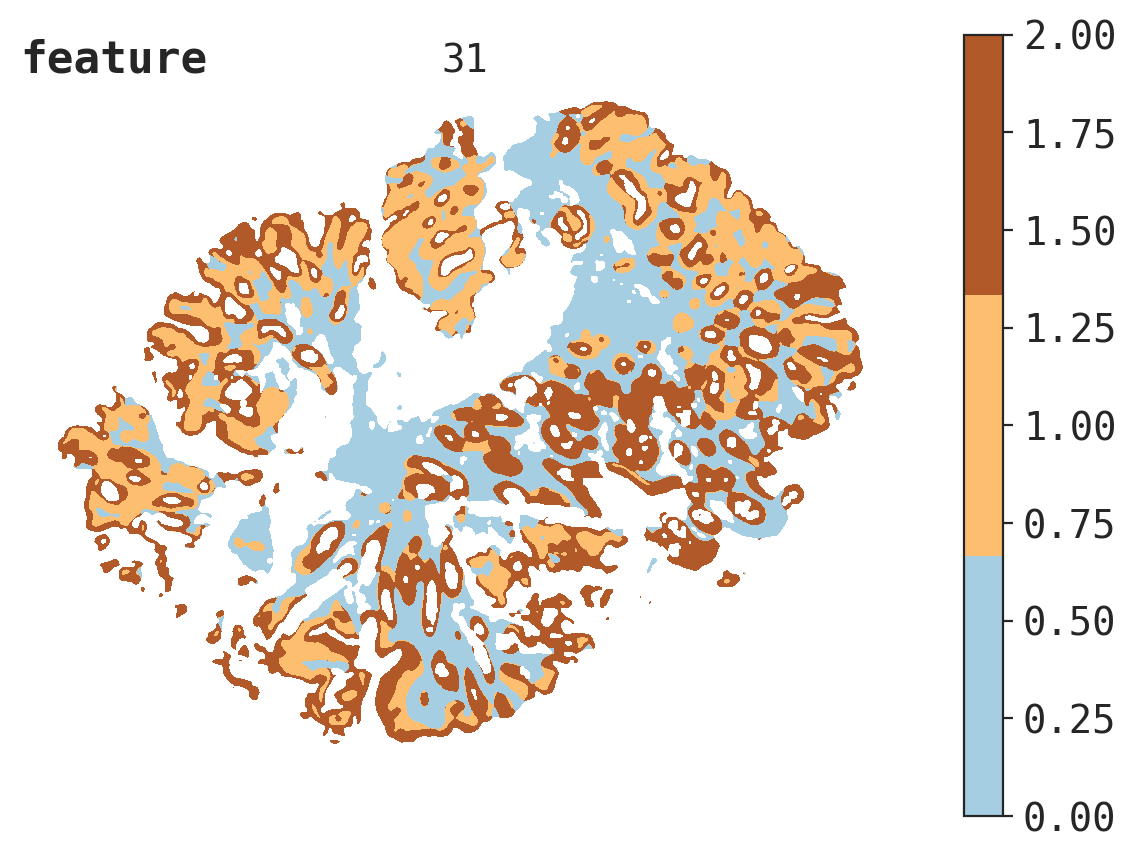

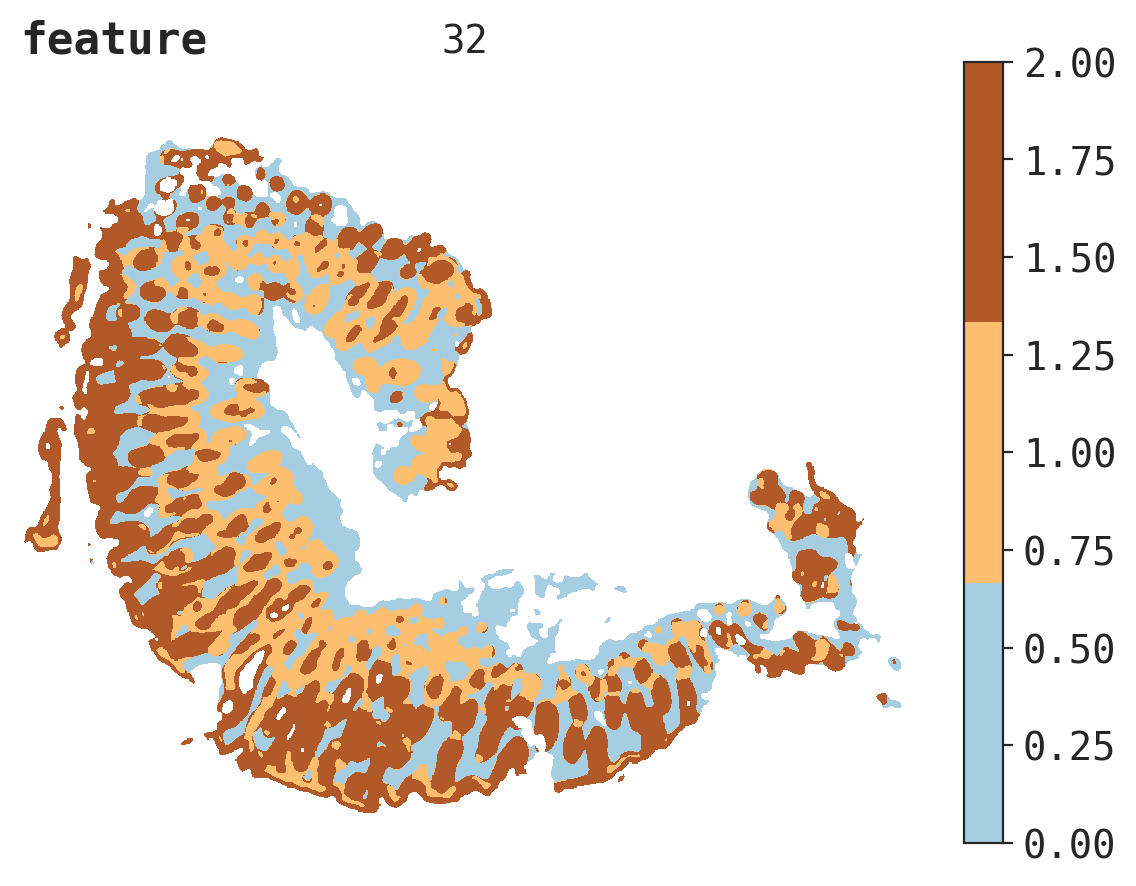

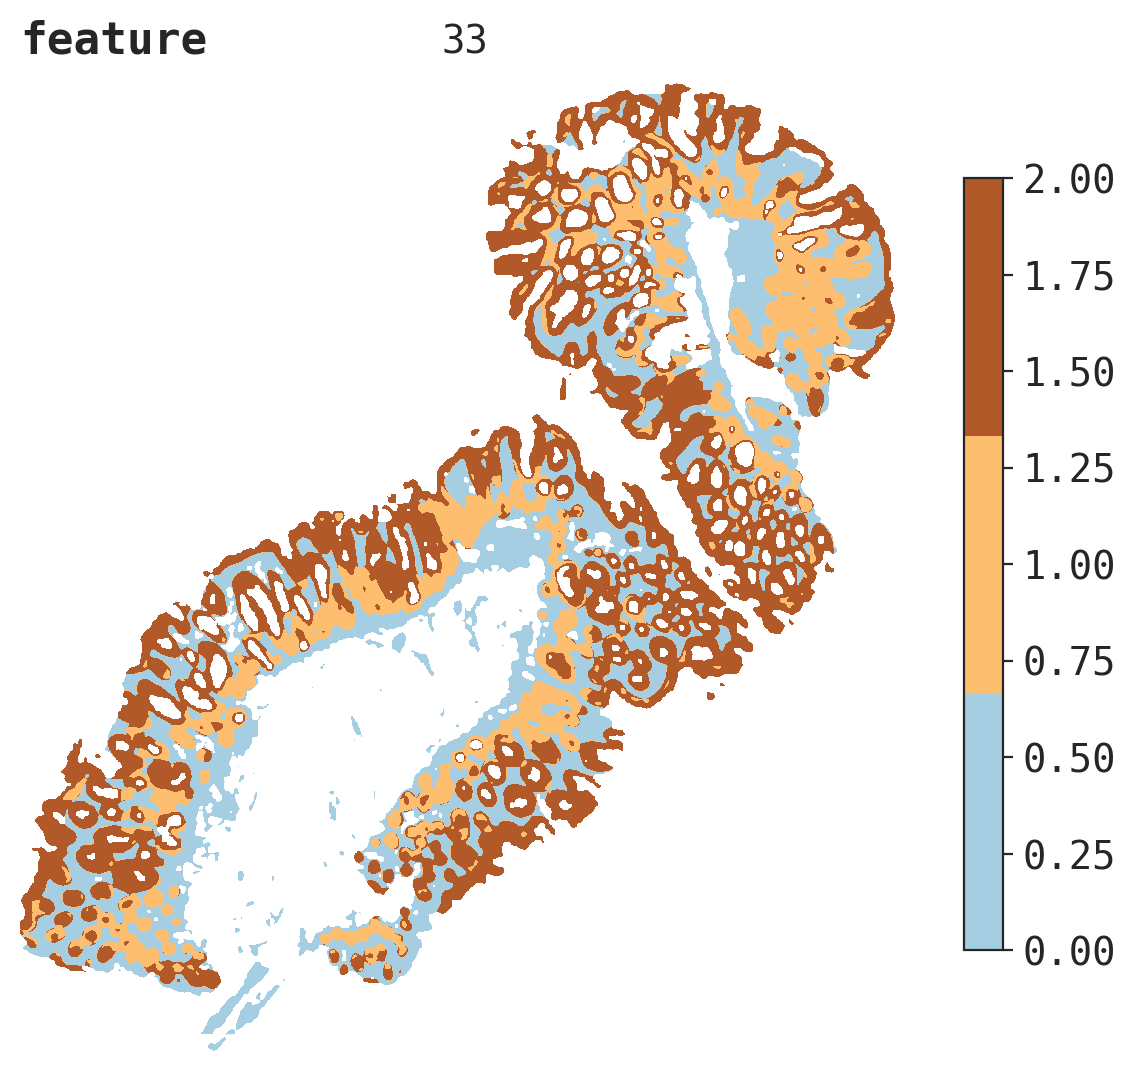

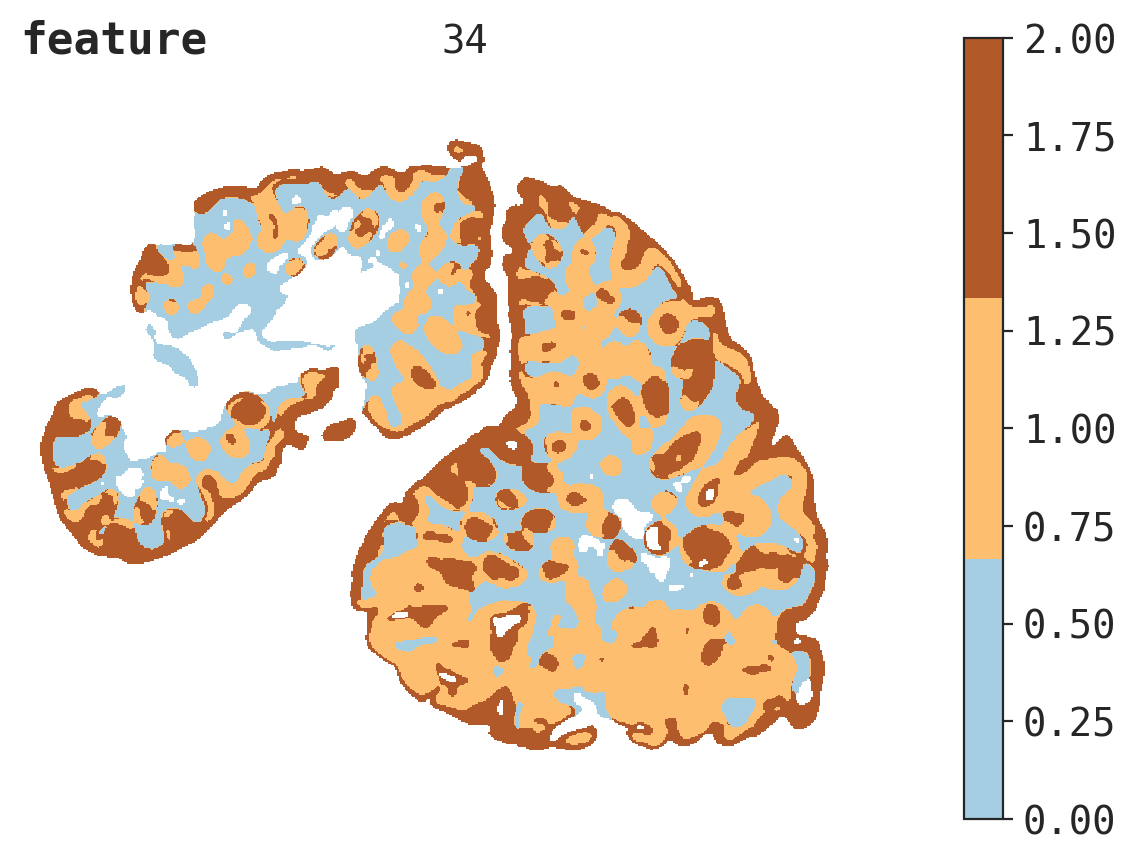

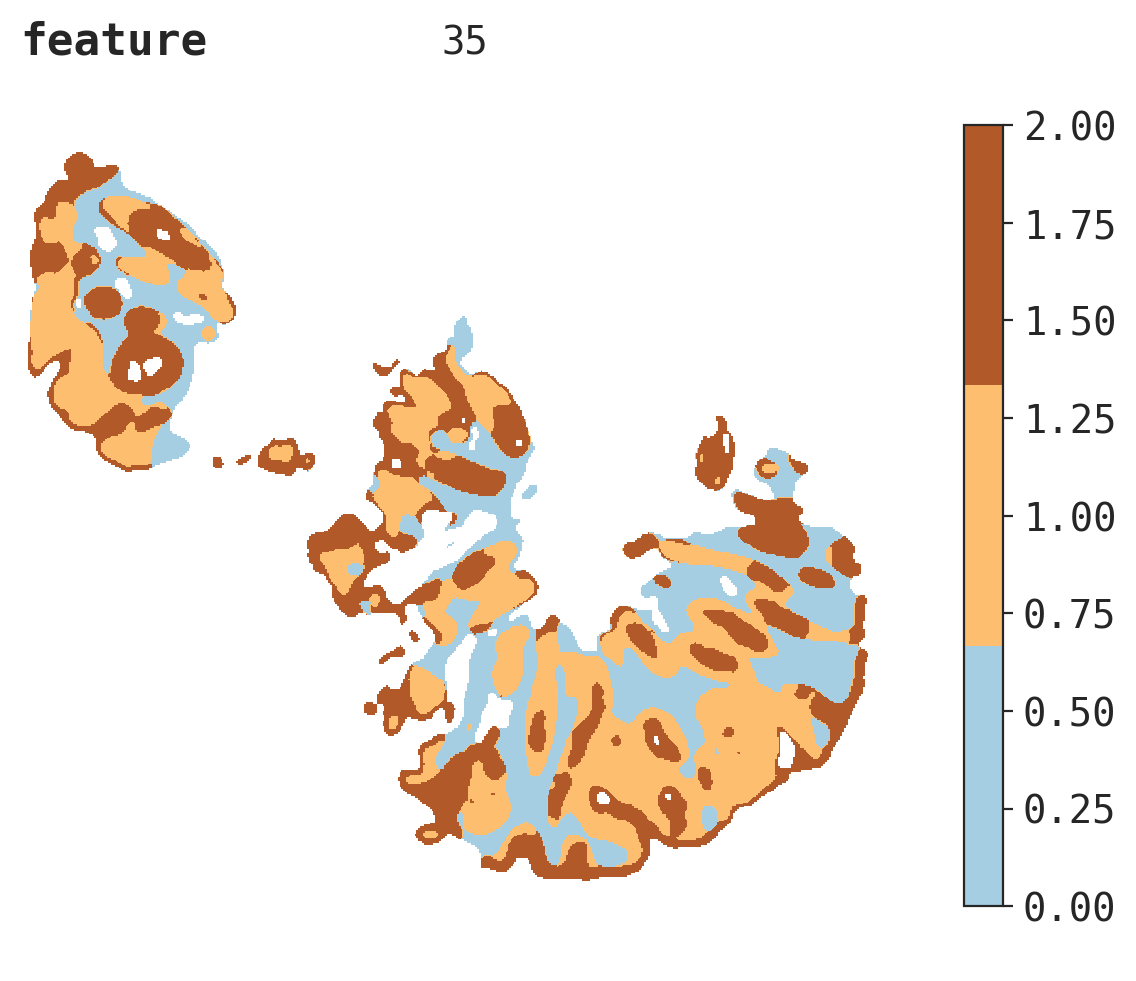

Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_9408_0000_02A_05_ADJ_region_002_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_8622_0000_01E_01_ADJ_region_004_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_8622_0000_01E_01_ADJ_region_005_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_9408_0000_02A_05_ADJ_region_001_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_8920_0000_02_02_ADJ_region_001_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_866_0000_02_03_ADJ_region_001_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCE

In [30]:
for i, tID in enumerate(tl.tissue_IDs):
    cmap = plt.cm.get_cmap('Paired',3)
    p = show_pita(tID, figsize=(6,6), cmap=cmap, save_to=None)
    plt.title(i)

GridSpec(2, 4)

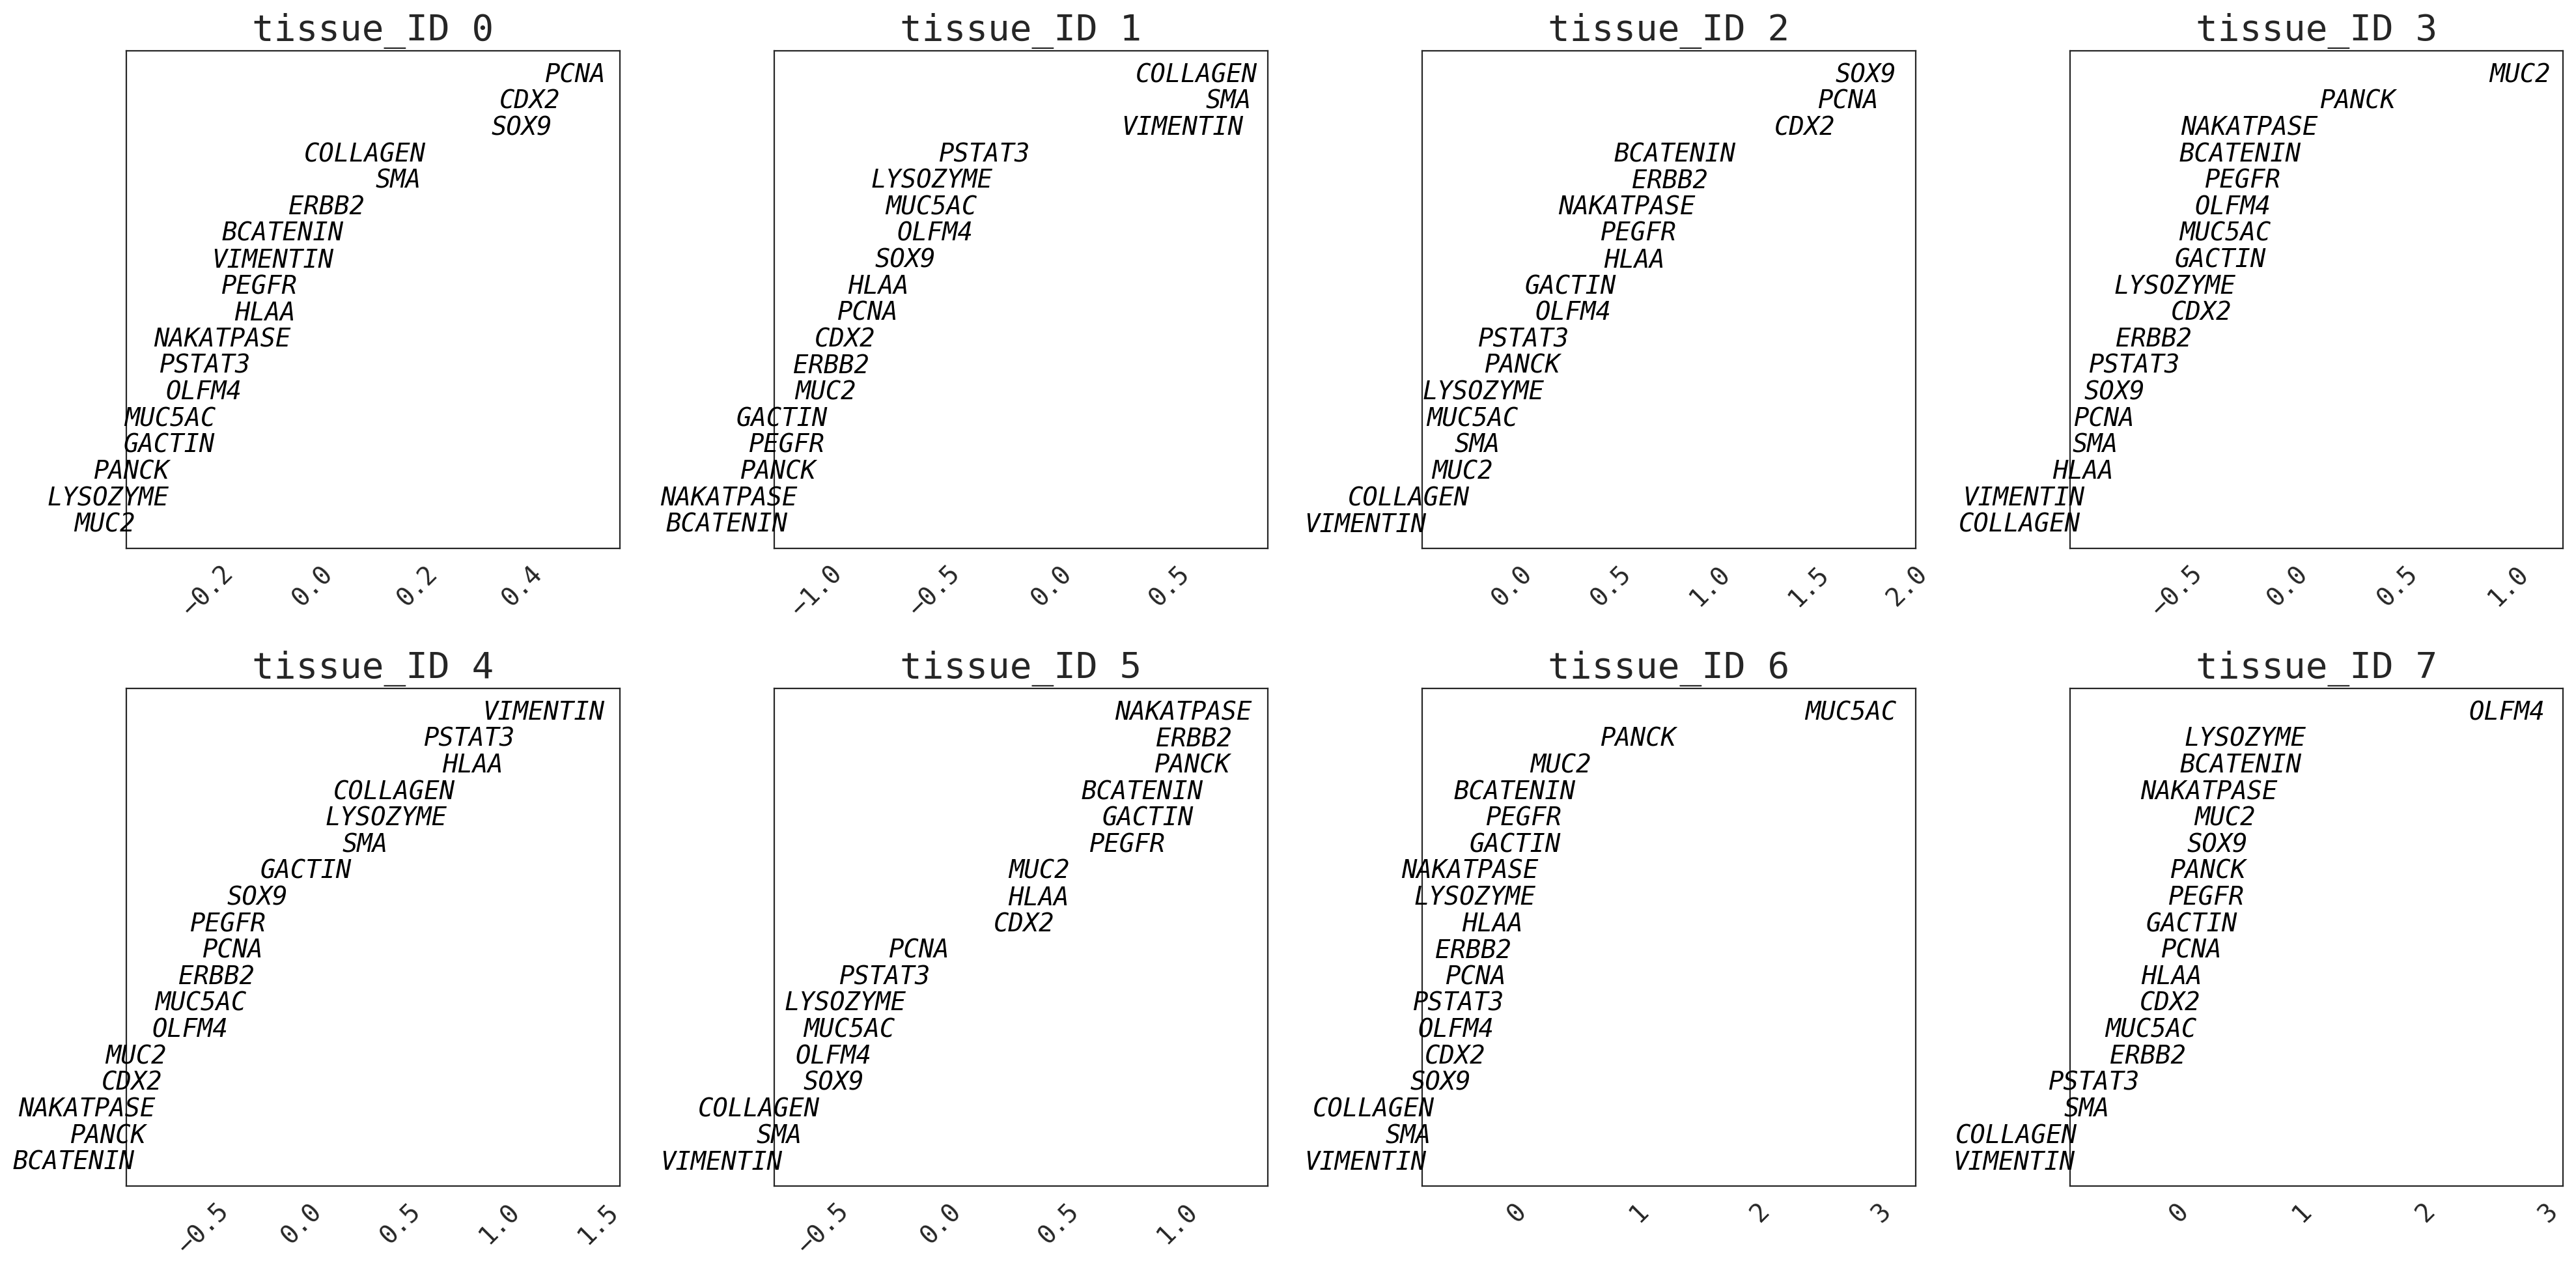

Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_4255_0000_02_02_ADJ_region_001_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_8099_0000_02_01_ADJ_region_004_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_8622_0000_01E_01_ADJ_region_001_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_866_0000_02_03_ADJ_region_001_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_7862_0000_02_02_ADJ_region_002_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_10623_0000_01_01_ADJ_region_003_downsampledfinal_preprocessed.npz...
Loading img object from /media/disk2/atlas_mxif/BALANCED/

In [21]:
tl.plot_feature_loadings(ncols=4)

In [28]:
df_count = pd.DataFrame()
for i in range(len(tl.tissue_IDs)):
    unique,counts = np.unique(tl.tissue_IDs[i], return_counts=True)
    df = pd.DataFrame(counts[:tl.k], columns = [i])
    df_count = pd.concat([df_count,df], axis = 1)

In [29]:
df_count = df_count/df_count.sum()

Text(0, 0.5, 'Tissue ID proportion')

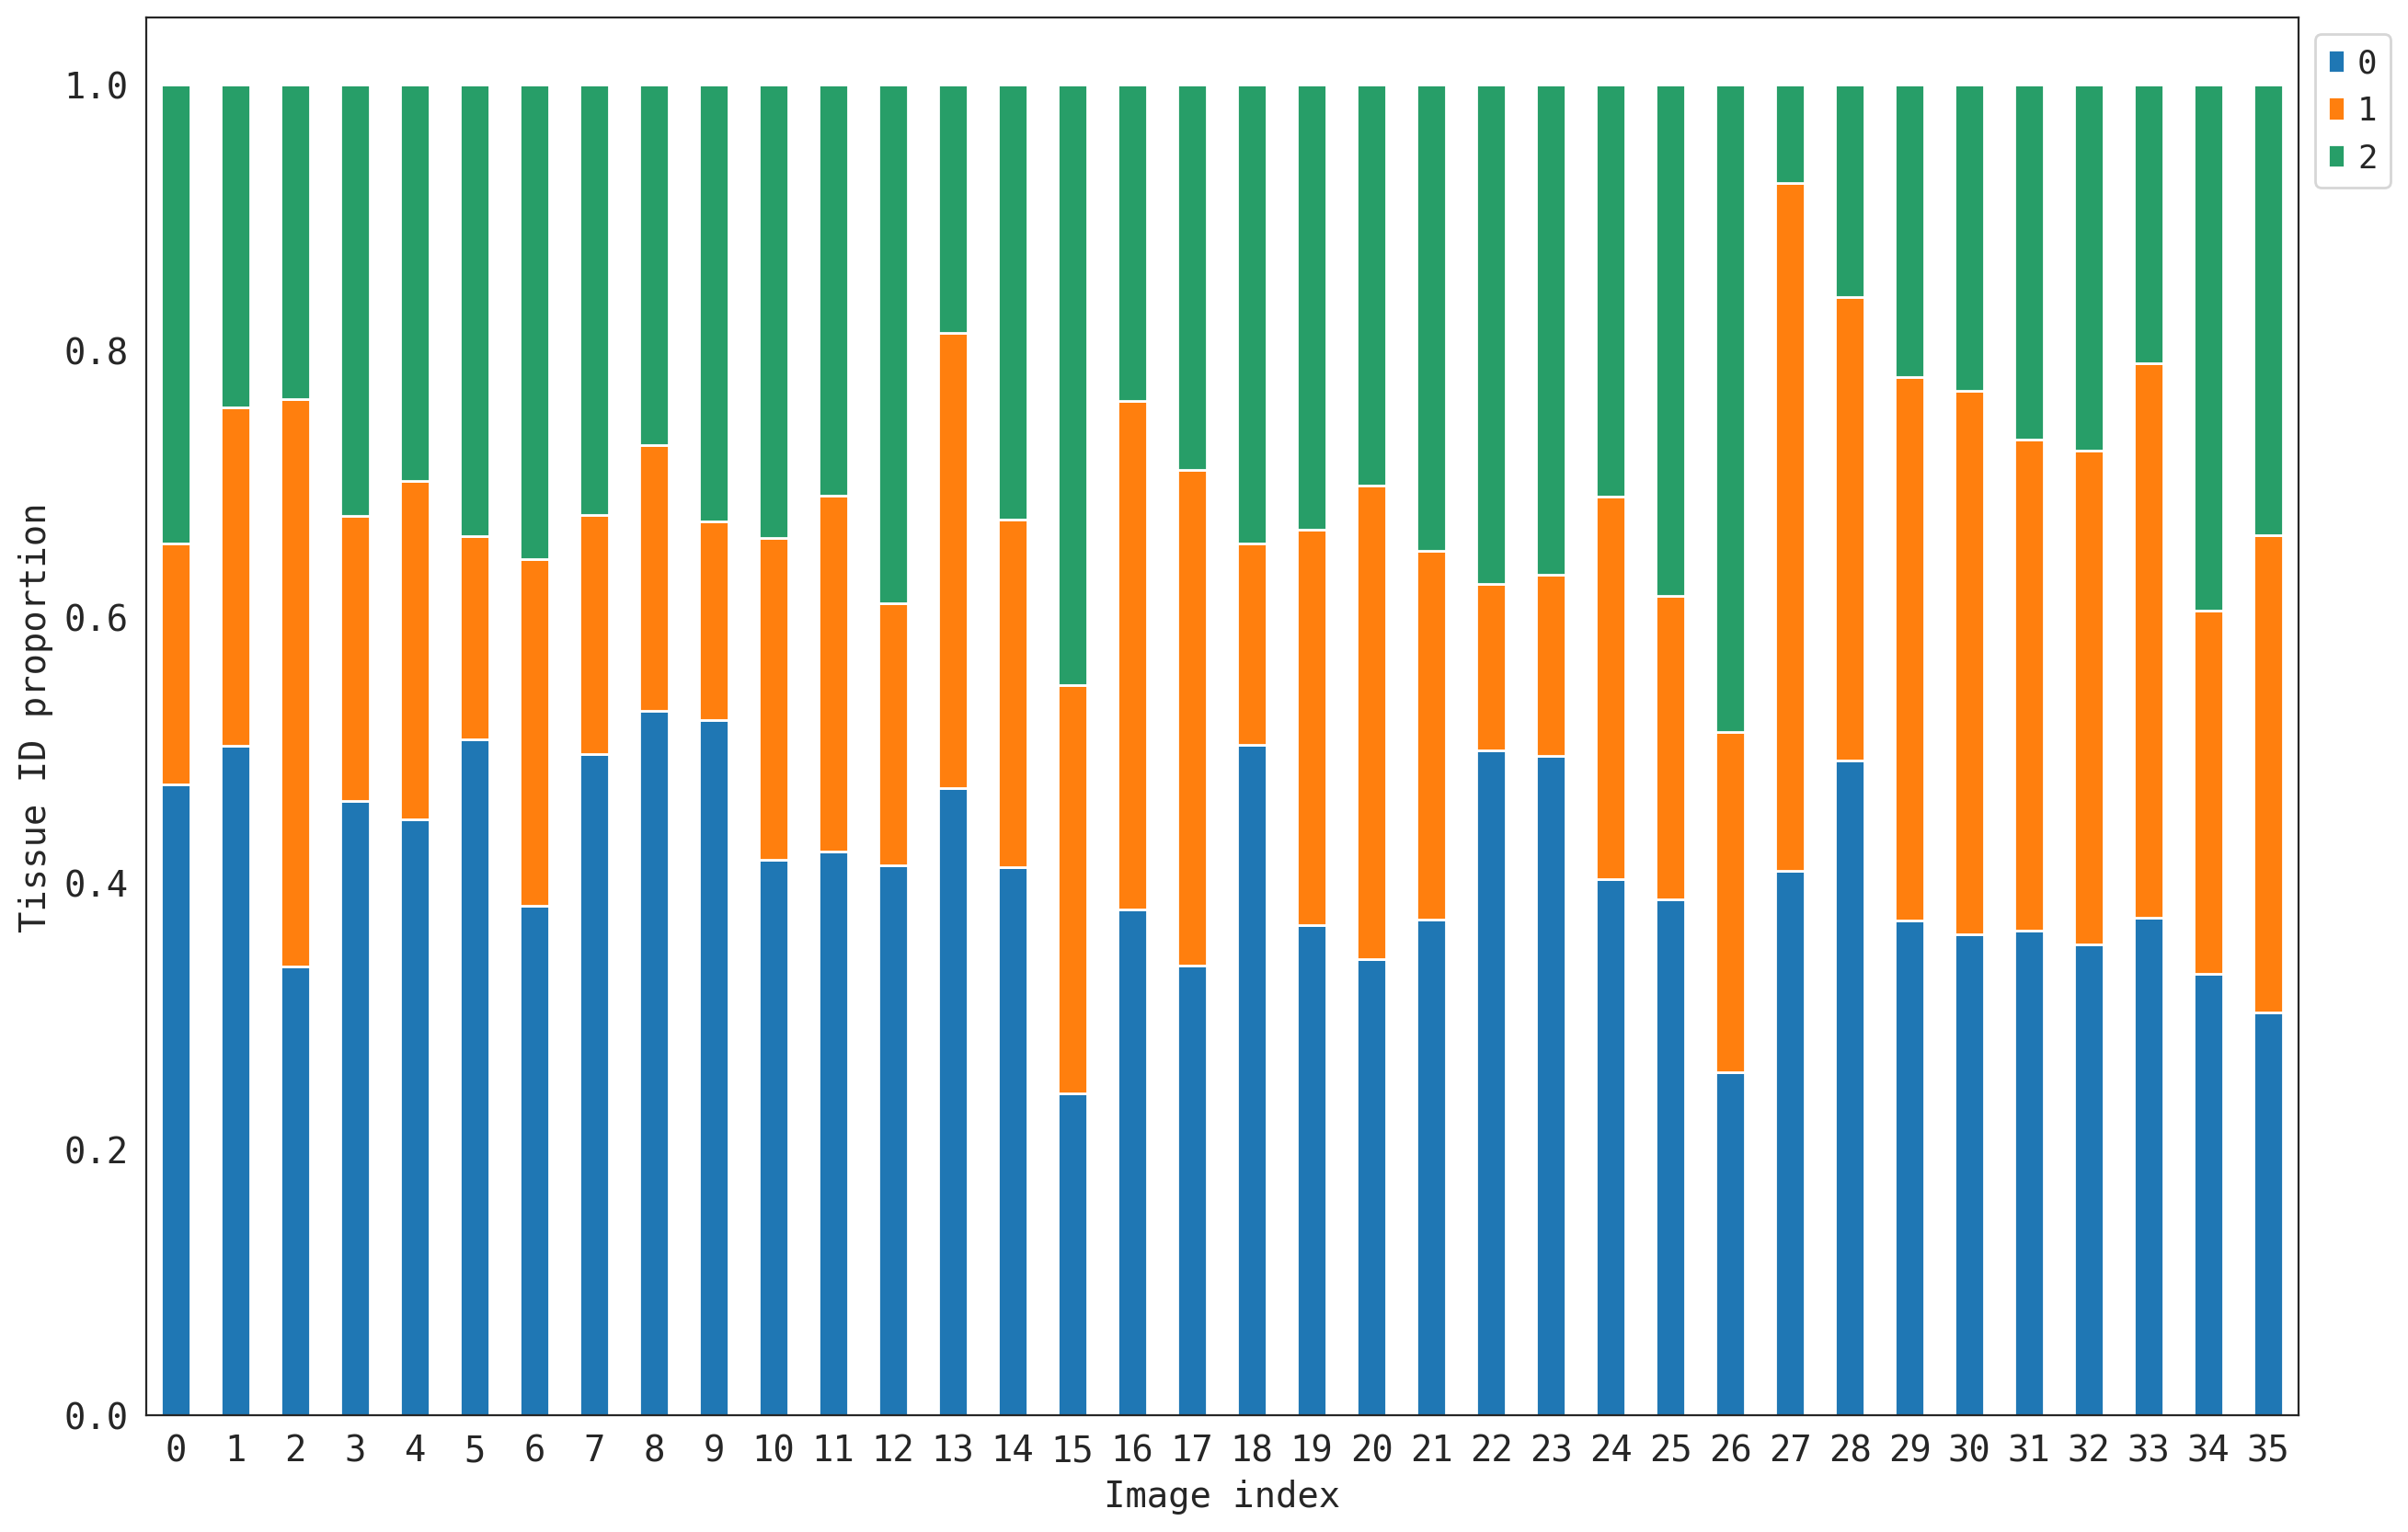

In [30]:
ax = df_count.T.plot.bar(stacked = True, rot = 0, figsize = (15,10))
ax.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.xlabel('Image index')
plt.ylabel('Tissue ID proportion')

In [22]:
def estimater_confidence_score(image_path, scaler, centroids, features, tissue_ID):
    image = img.from_npz(image_path + ".npz")
    if isinstance(features, int):  # force features into list if single integer
        features = [features]
    if isinstance(features, str):  # force features into int if single string
        features = [image.ch.index(features)]
    if checktype(features):  # force features into list of int if list of strings
        features = [image.ch.index(x) for x in features]
    if features is None:  # if no features are given, use all of them
        features = [x for x in range(image.n_ch)]
    dist = {}
    w,h,d = image.img[:,:,features].shape
    img_ar = image.img[:,:,features].reshape((w*h),d)
    scaled_img_ar = scaler.transform(img_ar)
    # estimating distance for each pixel from every cluster centroid
    for i, centroid in enumerate(centroids):
        dist_cp = (scaled_img_ar - centroid)**2
        dist[i] = np.sum(dist_cp, axis = 1)
    confidence_score = {}
    # estimating confidence score by taking a ratio of distance from i cluster to all of the clusters and then taking an inverse after summing it
    for i in dist.keys():
        ck = dist[i]
        score = []
        for j in dist.keys():
            cs = dist[j]
            score.append(ck/cs)
        confidence_score[i] = 1/sum(score)
    # creating a numpy array in the shape of the image storing the confidence scores for the cluster that pixel is assigned to
    Conf_ID = np.empty((w,h))
    mean_conf_score = {}
    for i, cID in confidence_score.items():
        cID = cID.reshape((w,h))
        cID[image.mask == 0] = np.nan
        Conf_ID[image.mask == 0] = np.nan
        Conf_ID[tissue_ID == i] = cID[tissue_ID == i]
        mean_conf_score[i] = Conf_ID[tissue_ID == i].mean()
    return Conf_ID, mean_conf_score 

In [23]:
cID, mean_conf_score = estimater_confidence_score(image_df['Img'][0], tl.scaler, tl.kmeans.cluster_centers_, clustermarkers, tl.tissue_IDs[0])

Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_10167_0000_01_01_ADJ_region_001_downsampledfinal_preprocessed.npz...


In [31]:
def estimater_percentage_variance(image_path, scaler, centroids, features, tissue_ID):
    image = img.from_npz(image_path + ".npz")
    if isinstance(features, int):  # force features into list if single integer
        features = [features]
    if isinstance(features, str):  # force features into int if single string
        features = [image.ch.index(features)]
    if checktype(features):  # force features into list of int if list of strings
        features = [image.ch.index(x) for x in features]
    if features is None:  # if no features are given, use all of them
        features = [x for x in range(image.n_ch)]
    # getting the channels used for MILWRM clustering and scaling the image
    w,h,d = image.img[:,:,features].shape
    img_ar = image.img[:,:,features].reshape((w*h),d)
    scaled_img_ar = scaler.transform(img_ar)
    tissue_ID = tissue_ID.reshape(w*h)
    # initializing a numpy array of image shape to store the distance from pixels to closest centroid
    dc = np.zeros(scaled_img_ar.shape)
    for i in range(centroids.shape[0]):
        dc[tissue_ID == i] = (scaled_img_ar[tissue_ID == i] - centroids[i])**2
    # estimating the difference between pixels and the image mean
    dm = (scaled_img_ar - scaled_img_ar.mean(axis=0))**2
    # getting sum across channels
    dc = np.sum(dc, axis = 1)
    dm = np.sum(dm, axis = 1)
    # estimating the ratio for pixels and getting a mean of it
    S_square = np.sum(dc)/np.sum(dm)
    return dc,dm, S_square

In [33]:
%%time
S_squre_for_each_image = []
R_squre_for_each_image = []
for path,tissue_ID in zip(tl.image_df['Img'], tl.tissue_IDs):
    dc,dm, S_square = estimater_percentage_variance(path, tl.scaler, tl.kmeans.cluster_centers_, clustermarkers, tissue_ID)
    print(S_square)
    S_squre_for_each_image.append(S_square)
    R_squre_for_each_image.append((1 - S_square))

Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_10167_0000_01_01_ADJ_region_001_downsampledfinal_preprocessed.npz...
0.24075413837970697
Loading img object from /media/disk2/atlas_mxif/BALANCED/final_preprocessed_images/HTA11_10167_0000_01_01_ADJ_region_002_downsampledfinal_preprocessed.npz...


BadZipFile: Bad CRC-32 for file 'img.npy'

Text(0, 0.5, 'percentage variance not explained by Kmeans')

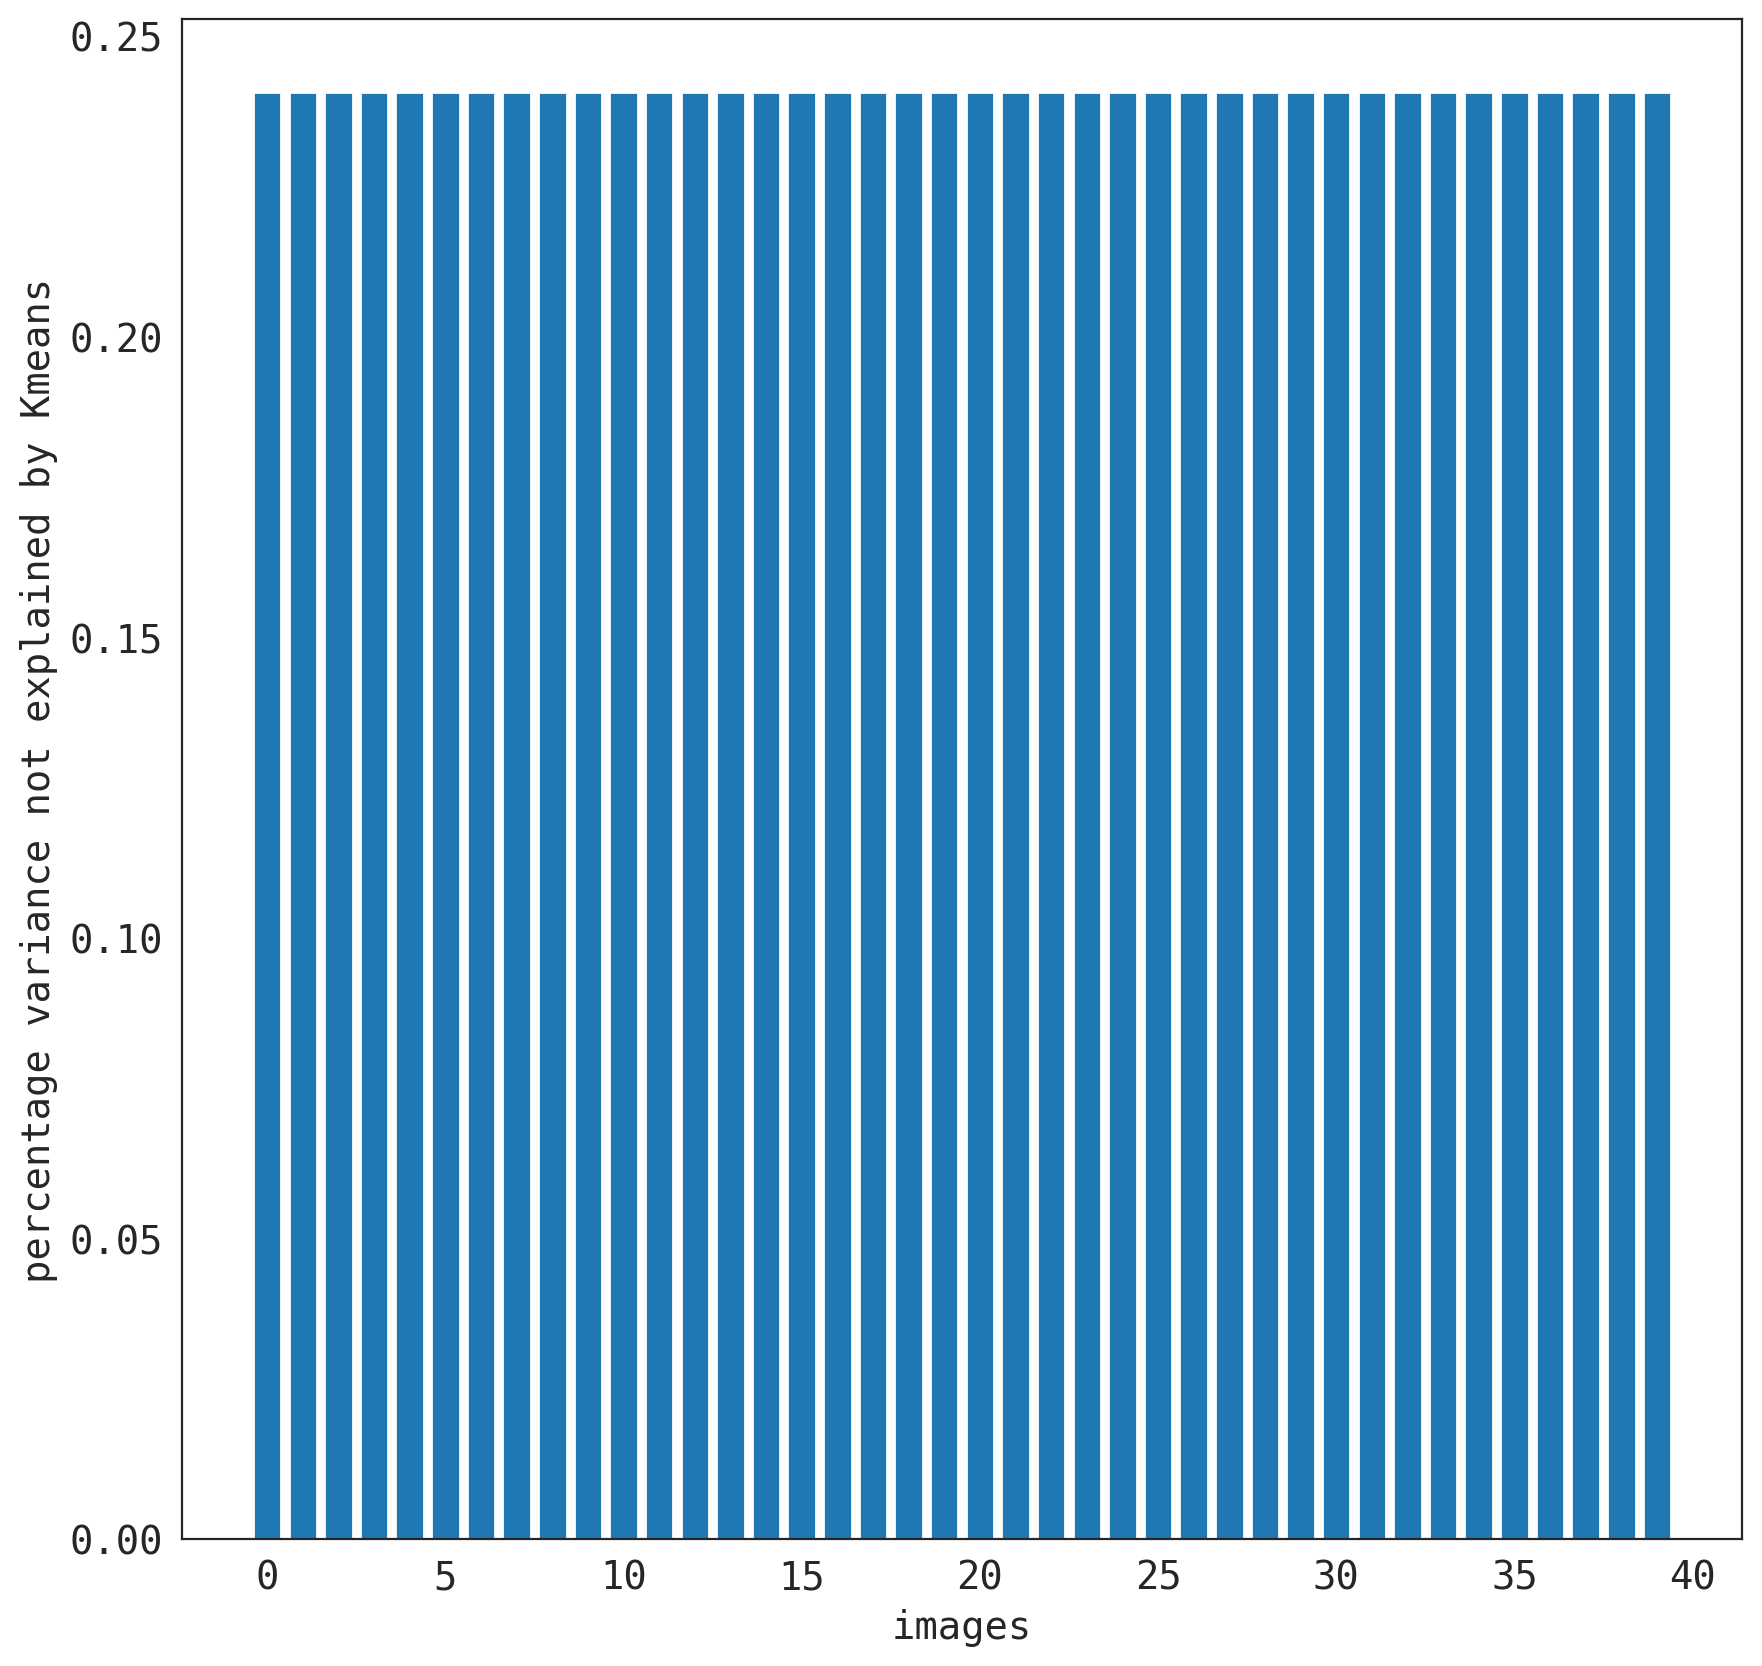

In [34]:
plt.figure(figsize = (10,10))
plt.bar(range(40),S_squre_for_each_image)
plt.xlabel('images')
plt.ylabel('percentage variance not explained by Kmeans')